## 🚴‍♂️ **Project Title:** Seoul Bike Sharing Demand Prediction

### 🧩 **Problem Description**

In modern urban cities, **rental bike systems** have become a key solution for enhancing daily mobility and reducing traffic congestion. To ensure a smooth and efficient bike-sharing service, it is essential to maintain the **right number of available bikes** throughout the day. Predicting **hourly bike demand** helps minimize waiting time for users and ensures stable supply for the service providers.

This project focuses on developing a **machine learning model** that accurately predicts the **number of rental bikes required per hour** based on historical data and weather conditions.

### 📊 **Data Description**

The dataset provides **hourly records** of environmental and temporal features that influence bike rental demand in Seoul city.

### 🧠 **Attribute Information:**

* **Date:** Year–Month–Day
* **Rented Bike Count:** Number of bikes rented per hour *(target variable)*
* **Hour:** Hour of the day (0–23)
* **Temperature (°C):** Ambient temperature in Celsius
* **Humidity (%):** Atmospheric humidity
* **Windspeed (m/s):** Average wind speed
* **Visibility (10m):** Visibility distance
* **Dew Point Temperature (°C):** Dew point in Celsius
* **Solar Radiation (MJ/m²):** Solar energy received
* **Rainfall (mm):** Amount of rainfall
* **Snowfall (cm):** Amount of snowfall
* **Seasons:** Categorical variable — *Winter, Spring, Summer, Autumn*
* **Holiday:** Indicates *Holiday* or *No Holiday*

### 🎯 **Goal:**

To build a robust predictive model that forecasts **hourly bike rental demand** using machine learning algorithms, optimizing resource allocation and improving service efficiency.


In [81]:
# Importing the libraries
import numpy as np
import pandas as pd
import math

import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [82]:
# Setting max display column limit
pd.set_option("display.max_columns", None)

# Use Seaborn's style
import seaborn as sns
sns.set_theme(style="whitegrid")  # modern, clean style

# Font and label styling
import matplotlib.pyplot as plt
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams["axes.titlesize"] = 25
plt.rcParams["axes.titleweight"] = "bold"
plt.rcParams["xtick.labelsize"] = 15
plt.rcParams["ytick.labelsize"] = 15
plt.rcParams["axes.labelsize"] = 20
plt.rcParams["legend.fontsize"] = 15
plt.rcParams["legend.title_fontsize"] = 15

In [83]:
import pandas as pd

# Load the dataset
df = pd.read_csv("Bike sharing.csv")

# Check total rows and columns
print(f'The shape of dataset is {df.shape} \nTotal Rows are: {df.shape[0]}\nTotal Columns are: {df.shape[1]}')

The shape of dataset is (10886, 12) 
Total Rows are: 10886
Total Columns are: 12


In [84]:
# Preview the dataset
print(df.head())

           datetime  season  holiday  workingday  weather  temp   atemp  \
0  01-01-2011 00:00       1        0           0        1  9.84  14.395   
1  01-01-2011 01:00       1        0           0        1  9.02  13.635   
2  01-01-2011 02:00       1        0           0        1  9.02  13.635   
3  01-01-2011 03:00       1        0           0        1  9.84  14.395   
4  01-01-2011 04:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40  
2        80        0.0       5          27     32  
3        75        0.0       3          10     13  
4        75        0.0       0           1      1  


In [85]:
print(df.tail())

               datetime  season  holiday  workingday  weather   temp   atemp  \
10881  19-12-2012 19:00       4        0           1        1  15.58  19.695   
10882  19-12-2012 20:00       4        0           1        1  14.76  17.425   
10883  19-12-2012 21:00       4        0           1        1  13.94  15.910   
10884  19-12-2012 22:00       4        0           1        1  13.94  17.425   
10885  19-12-2012 23:00       4        0           1        1  13.12  16.665   

       humidity  windspeed  casual  registered  count  
10881        50    26.0027       7         329    336  
10882        57    15.0013      10         231    241  
10883        61    15.0013       4         164    168  
10884        61     6.0032      12         117    129  
10885        66     8.9981       4          84     88  


In [86]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB
None


In [87]:
print(df.isnull().sum())

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64


In [88]:
df.describe(include = 'all')

datetime        season       holiday    workingday  \
count              10886  10886.000000  10886.000000  10886.000000   
unique             10886           NaN           NaN           NaN   
top     01-01-2011 00:00           NaN           NaN           NaN   
freq                   1           NaN           NaN           NaN   
mean                 NaN      2.506614      0.028569      0.680875   
std                  NaN      1.116174      0.166599      0.466159   
min                  NaN      1.000000      0.000000      0.000000   
25%                  NaN      2.000000      0.000000      0.000000   
50%                  NaN      3.000000      0.000000      1.000000   
75%                  NaN      4.000000      0.000000      1.000000   
max                  NaN      4.000000      1.000000      1.000000   

             weather         temp         atemp      humidity     windspeed  \
count   10886.000000  10886.00000  10886.000000  10886.000000  10886.000000   
unique           NaN          NaN           NaN           NaN           NaN   
top              NaN          NaN           NaN           NaN           NaN   
freq             NaN          NaN           NaN           NaN           NaN   
mean        1.418427     20.23086     23.655084     61.886460     12.799395   
std         0.633839      7.79159      8.474601     19.245033      8.164537   
min         1.000000      0.82000      0.760000      0.000000      0.000000   
25%         1.000000     13.94000     16.665000     47.000000      7.001500   
50%         1.000000     20.50000     24.240000     62.000000     12.998000   
75%         2.000000     26.24000     31.060000     77.000000     16.997900   
max         4.000000     41.00000     45.455000    100.000000     56.996900   

              casual    registered         count  
count   10886.000000  10886.000000  10886.000000  
unique           NaN           NaN           NaN  
top              NaN           NaN           NaN  
freq             NaN           NaN           NaN  
mean       36.021955    155.552177    191.574132  
std        49.960477    151.039033    181.144454  
min         0.000000      0.000000      1.000000  
25%         4.000000     36.000000     42.000000  
50%        17.000000    118.000000    145.000000  
75%        49.000000    222.000000    284.000000  
max       367.000000    886.000000    977.000000

In [89]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [90]:
df['datetime'] = pd.to_datetime(df['datetime'], dayfirst=True, errors='coerce')

In [91]:
# Creating new columns 'Month', 'Year', and 'Day'
df['Month'] = df['datetime'].dt.month
df['Year'] = df['datetime'].dt.year
df['Day'] = df['datetime'].dt.day_name()

In [92]:
# Creating a new column: 1 if weekend, 0 if weekday
df['Weekdays_or_weekend'] = df['Day'].apply(lambda x: 1 if x == 'Saturday' or x == 'Sunday' else 0)

In [93]:
# Drop the original 'datetime' and 'Day' columns
df.drop(['datetime', 'Day'], axis=1, inplace=True)

In [94]:
# Check the first 2 rows with the newly created columns
df.head(2)

season  holiday  workingday  weather  temp   atemp  humidity  windspeed  \
0       1        0           0        1  9.84  14.395        81        0.0   
1       1        0           0        1  9.02  13.635        80        0.0   

   casual  registered  count  Month  Year  Weekdays_or_weekend  
0       3          13     16      1  2011                    1  
1       8          32     40      1  2011                    1

In [95]:
# Get distinct counts for season categories
df['season'].value_counts()

season
4    2734
2    2733
3    2733
1    2686
Name: count, dtype: int64

In [96]:
# Get distinct counts for holiday categories
df['holiday'].value_counts()

holiday
0    10575
1      311
Name: count, dtype: int64

In [97]:
# Get distinct counts for working day categories
df['workingday'].value_counts()

workingday
1    7412
0    3474
Name: count, dtype: int64

In [98]:
# Get distinct counts for Month categories
df['Month'].value_counts()

Month
5     912
6     912
7     912
8     912
12    912
10    911
11    911
4     909
9     909
2     901
3     901
1     884
Name: count, dtype: int64

In [99]:
# Get distinct counts for Weekdays vs Weekend
df['Weekdays_or_weekend'].value_counts()

Weekdays_or_weekend
0    7723
1    3163
Name: count, dtype: int64

In [100]:
# Check the summary statistics of the dataset
df.describe()

season       holiday    workingday       weather         temp  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.00000   
mean       2.506614      0.028569      0.680875      1.418427     20.23086   
std        1.116174      0.166599      0.466159      0.633839      7.79159   
min        1.000000      0.000000      0.000000      1.000000      0.82000   
25%        2.000000      0.000000      0.000000      1.000000     13.94000   
50%        3.000000      0.000000      1.000000      1.000000     20.50000   
75%        4.000000      0.000000      1.000000      2.000000     26.24000   
max        4.000000      1.000000      1.000000      4.000000     41.00000   

              atemp      humidity     windspeed        casual    registered  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.000000   
mean      23.655084     61.886460     12.799395     36.021955    155.552177   
std        8.474601     19.245033      8.164537     49.960477    151.039033   
min        0.760000      0.000000      0.000000      0.000000      0.000000   
25%       16.665000     47.000000      7.001500      4.000000     36.000000   
50%       24.240000     62.000000     12.998000     17.000000    118.000000   
75%       31.060000     77.000000     16.997900     49.000000    222.000000   
max       45.455000    100.000000     56.996900    367.000000    886.000000   

              count         Month          Year  Weekdays_or_weekend  
count  10886.000000  10886.000000  10886.000000         10886.000000  
mean     191.574132      6.521495   2011.501929             0.290557  
std      181.144454      3.444373      0.500019             0.454040  
min        1.000000      1.000000   2011.000000             0.000000  
25%       42.000000      4.000000   2011.000000             0.000000  
50%      145.000000      7.000000   2012.000000             0.000000  
75%      284.000000     10.000000   2012.000000             1.000000  
max      977.000000     12.000000   2012.000000             1.000000

In [101]:
# Checking duplicate rows in the dataset
duplicates = df.duplicated().sum()
print(f"We have {duplicates} duplicate rows in our Bike Data.")

We have 19 duplicate rows in our Bike Data.


In [102]:
numeric_features = df.describe().columns
print(numeric_features)

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'casual', 'registered', 'count', 'Month',
       'Year', 'Weekdays_or_weekend'],
      dtype='object')


In [103]:
# Assuming your dataframe is named df
categorical_columns = list(set(df.columns) - set(numeric_features))
print(categorical_columns)

[]


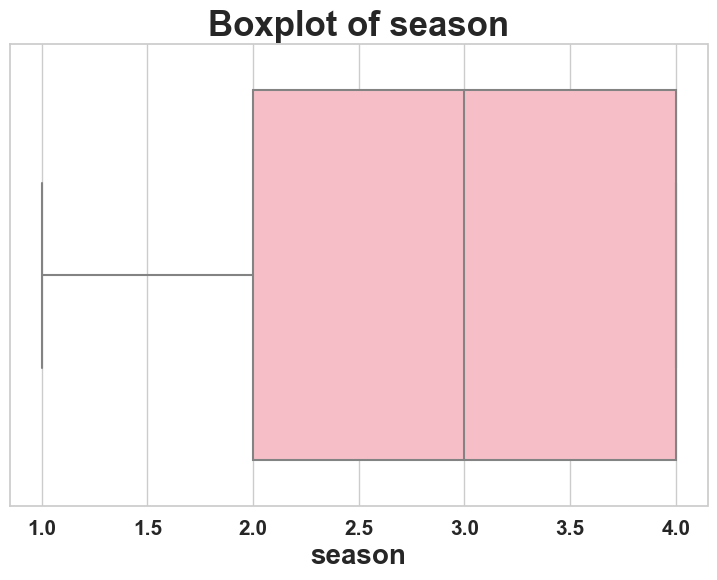

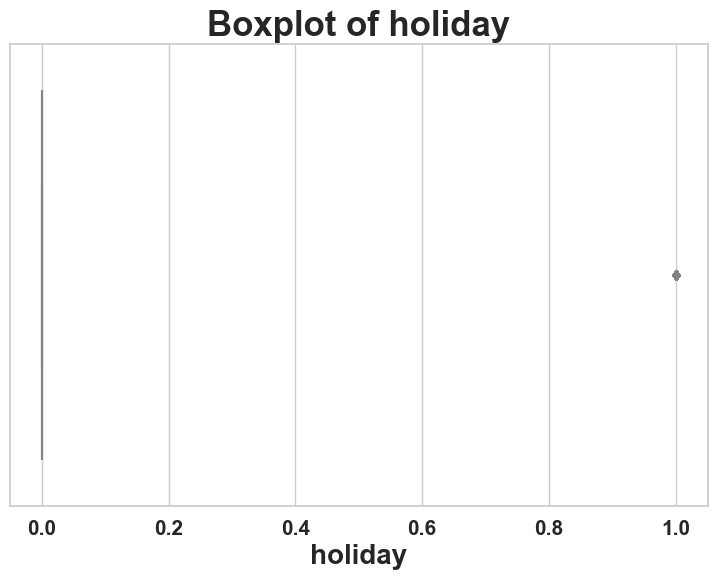

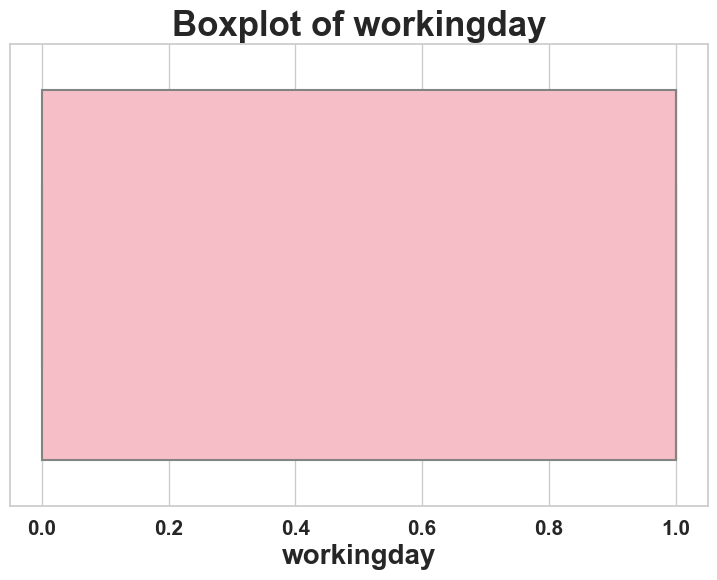

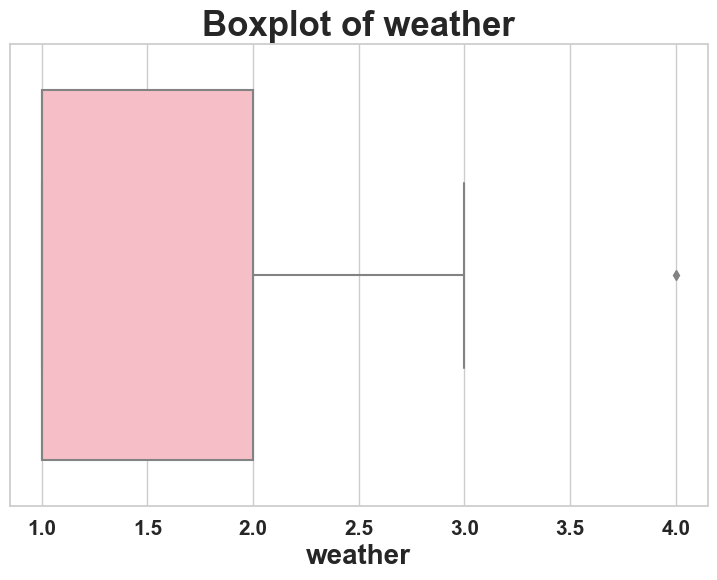

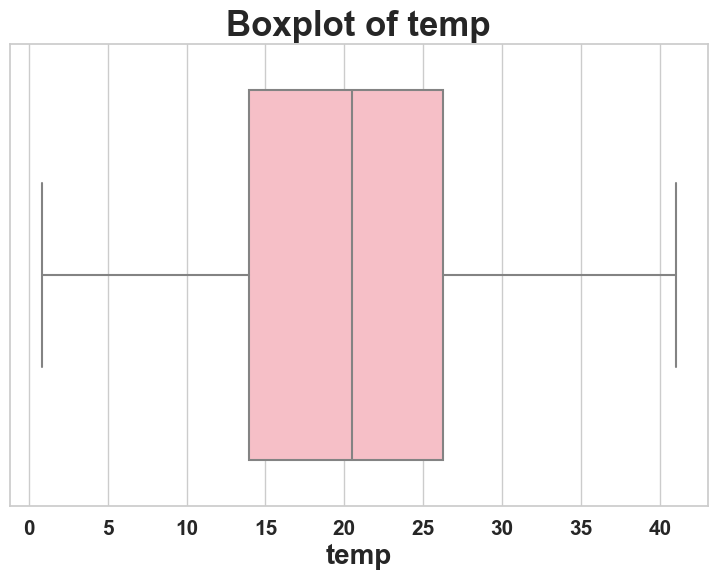

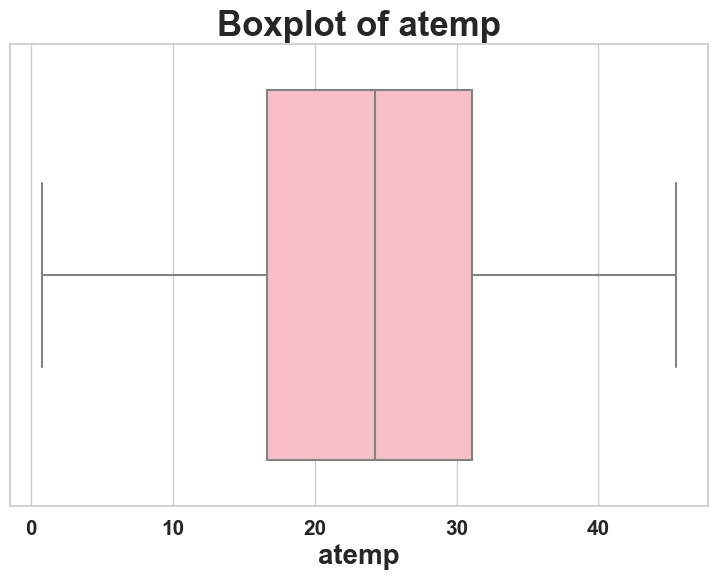

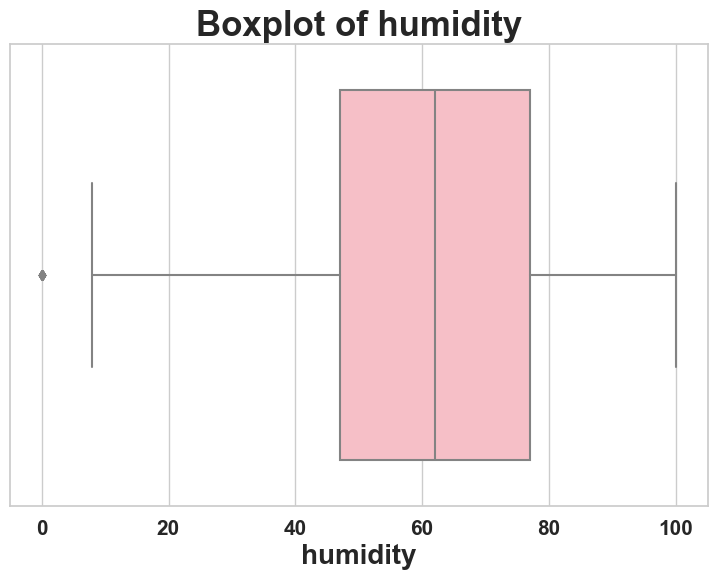

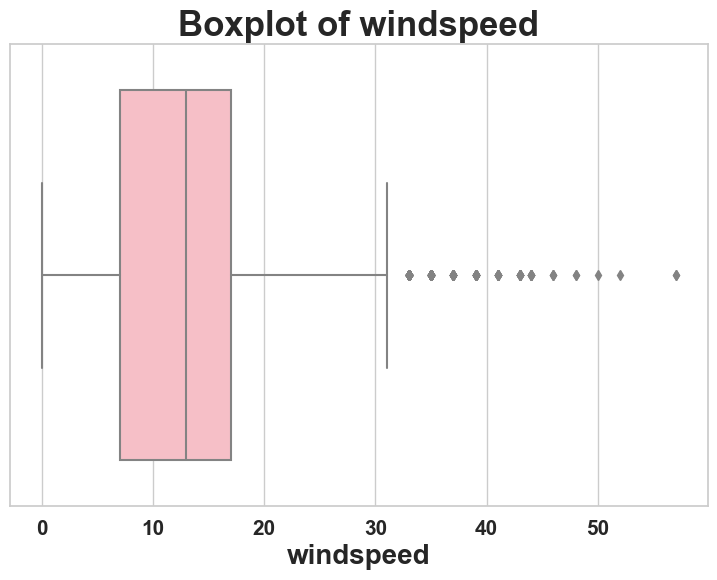

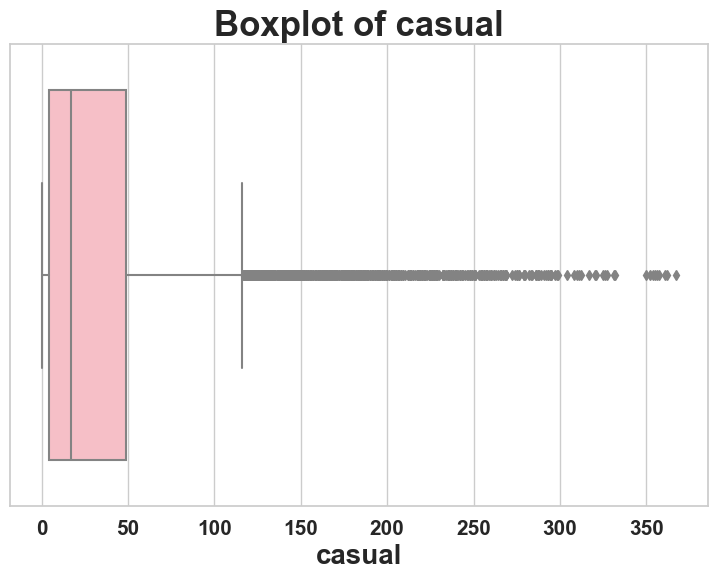

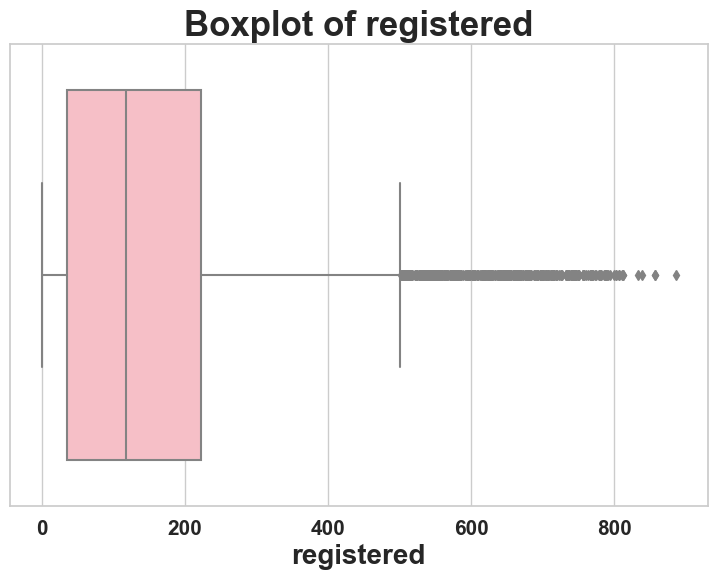

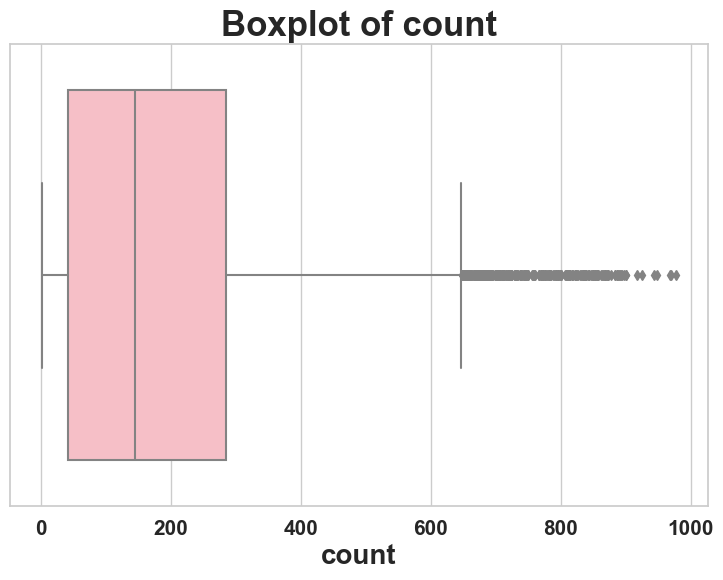

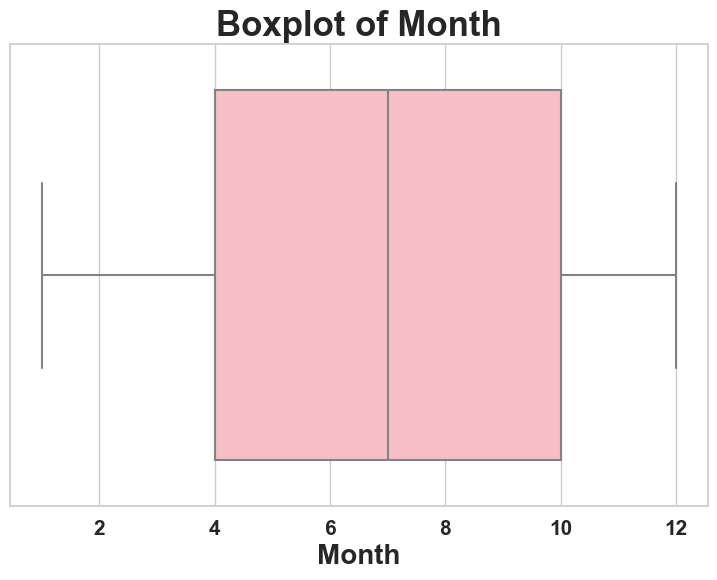

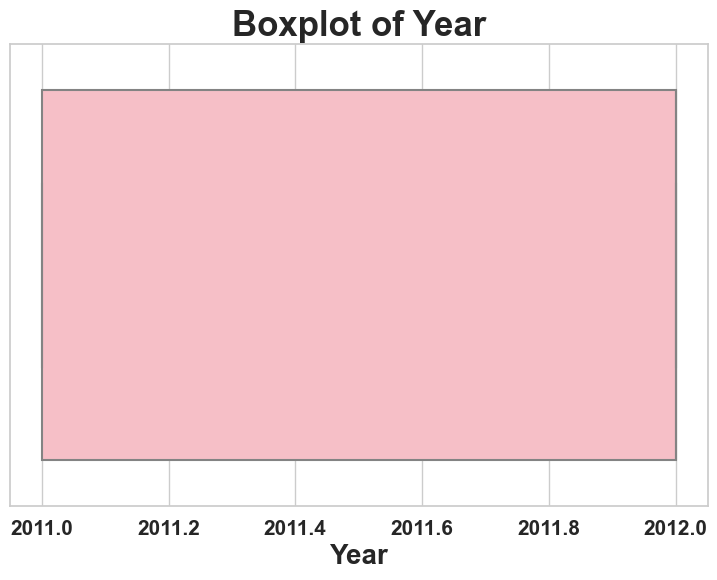

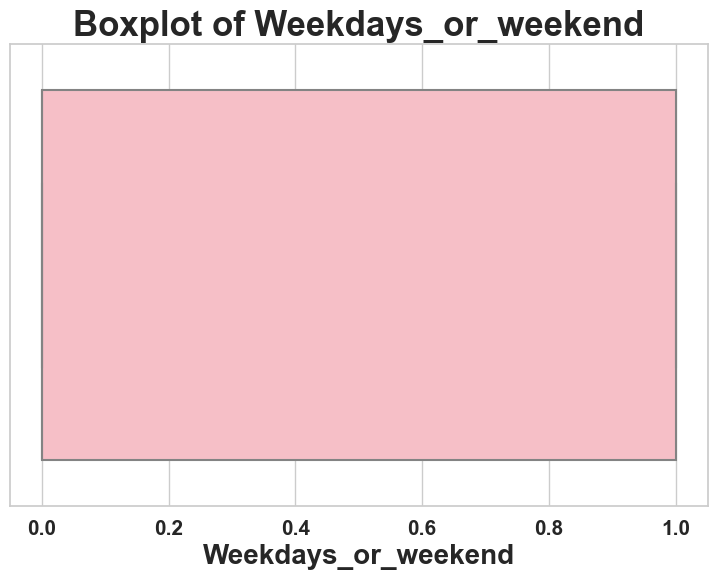

In [104]:
# plotting box plot of numeric columns to check outliers
for col in numeric_features:
    fig = plt.figure(figsize=(9,6))
    ax = fig.gca()
    sns.boxplot(x=df[col], color='lightpink')  # light pink color
    plt.title(f'Boxplot of {col}')
    plt.show()



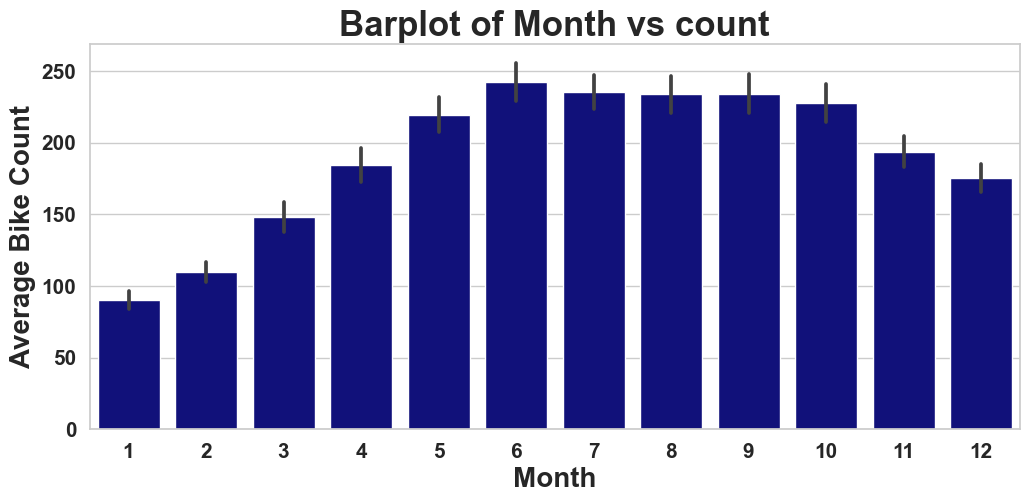

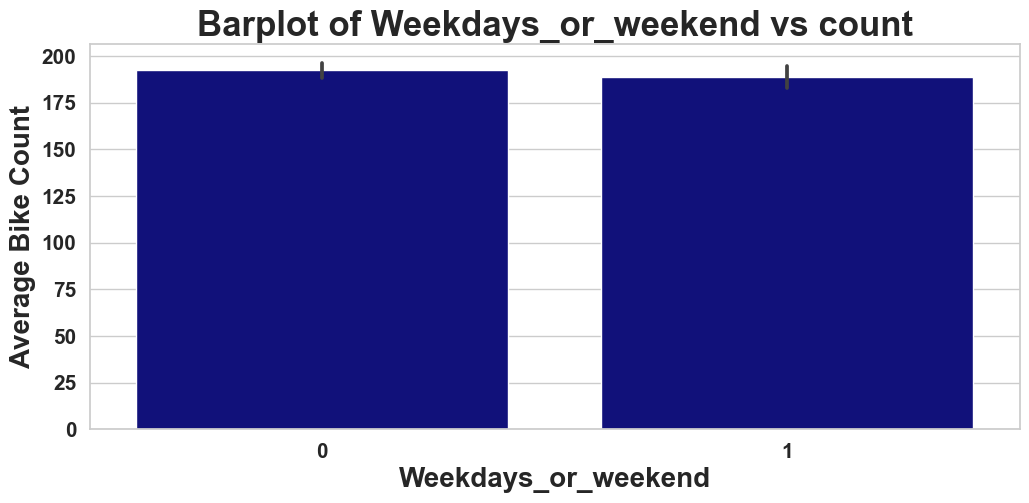

In [105]:
# Adding two more categorical columns 
categorical_columns.extend(['Month', 'Weekdays_or_weekend'])

# Plot barchart for each categorical column with respect to target variable
for col in categorical_columns:
    fig = plt.figure(figsize=(12, 5))
    ax = fig.gca()
    sns.barplot(x=df[col], y=df['count'], color='darkblue')  # use 'count' instead of 'Rented_Bike_Count'
    plt.title(f'Barplot of {col} vs count')
    plt.xlabel(col)
    plt.ylabel('Average Bike Count')
    plt.show()



In [106]:
print(df.columns.tolist())


['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count', 'Month', 'Year', 'Weekdays_or_weekend']


### 📊 Observations from Categorical Analysis

1. **Month vs Count**  
   Bike rentals were higher during warmer months (May–September) and lower in colder months (December–January), showing a clear seasonal pattern.

2. **Weekdays_or_weekend vs Count**  
   Rentals were slightly higher on weekdays, suggesting most users rent bikes for office or daily commutes.

3. **Season vs Count**  
   Summer and autumn showed higher demand, while winter had the least rentals, indicating weather’s strong effect on demand.

4. **Weather vs Count**  
   Clear or partly cloudy weather had the most rentals, while rainy or snowy days reduced bike usage.

5. **Workingday vs Count**  
   Working days had more rentals than holidays, again showing that many users are regular commuters.


### Dependent Variable (Rented_Bike_Count) vs Categorical Columns


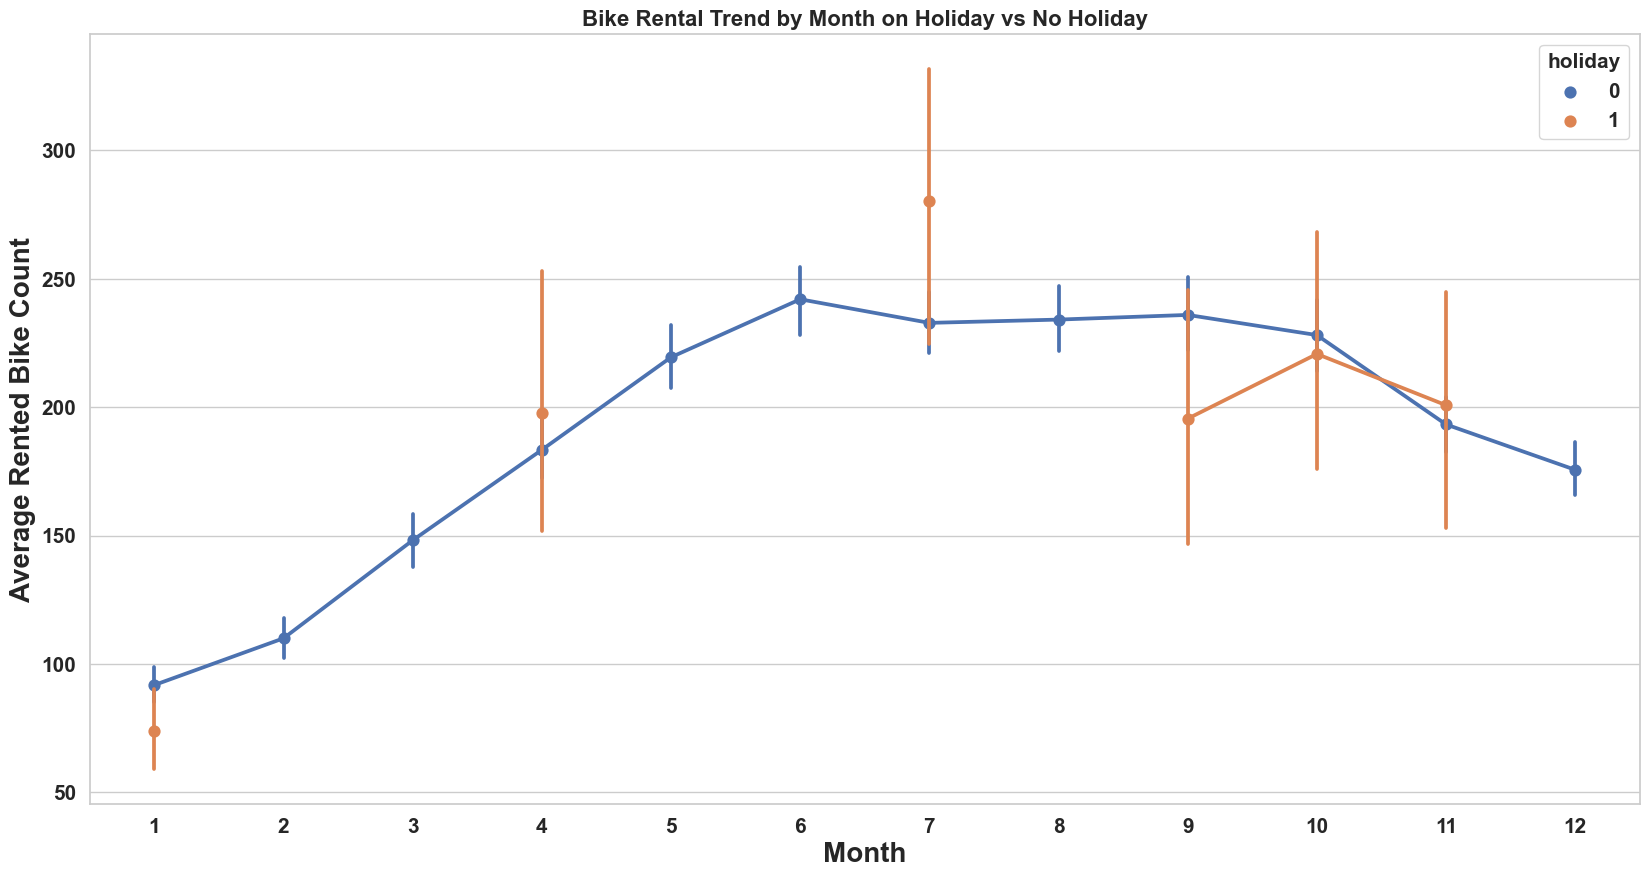

In [109]:
# Bike Rental trend with respect to Hour on Holiday or No Holiday
plt.figure(figsize=(20, 10))
sns.pointplot(x='Month', y='count', hue='holiday', data=df)
plt.title("Bike Rental Trend by Month on Holiday vs No Holiday", fontsize=16)
plt.xlabel("Month")
plt.ylabel("Average Rented Bike Count")
plt.show()

🧠 Observations:

The overall bike rental count varies significantly across months, showing seasonal patterns.

Non-holiday days generally record a higher rental count, indicating routine commuting behavior.

Holiday rentals tend to drop, suggesting bikes are used more for work or daily travel than leisure.

A noticeable increase in rentals during warmer months (like May–September) reflects the impact of pleasant weather.

Winter months show lower rentals due to cold or unfavorable weather conditions.

The trend suggests strong seasonality and dependence on holidays and climate, which are key predictors for the model.

In [113]:
df.columns

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'casual', 'registered', 'count', 'Month',
       'Year', 'Weekdays_or_weekend'],
      dtype='object')

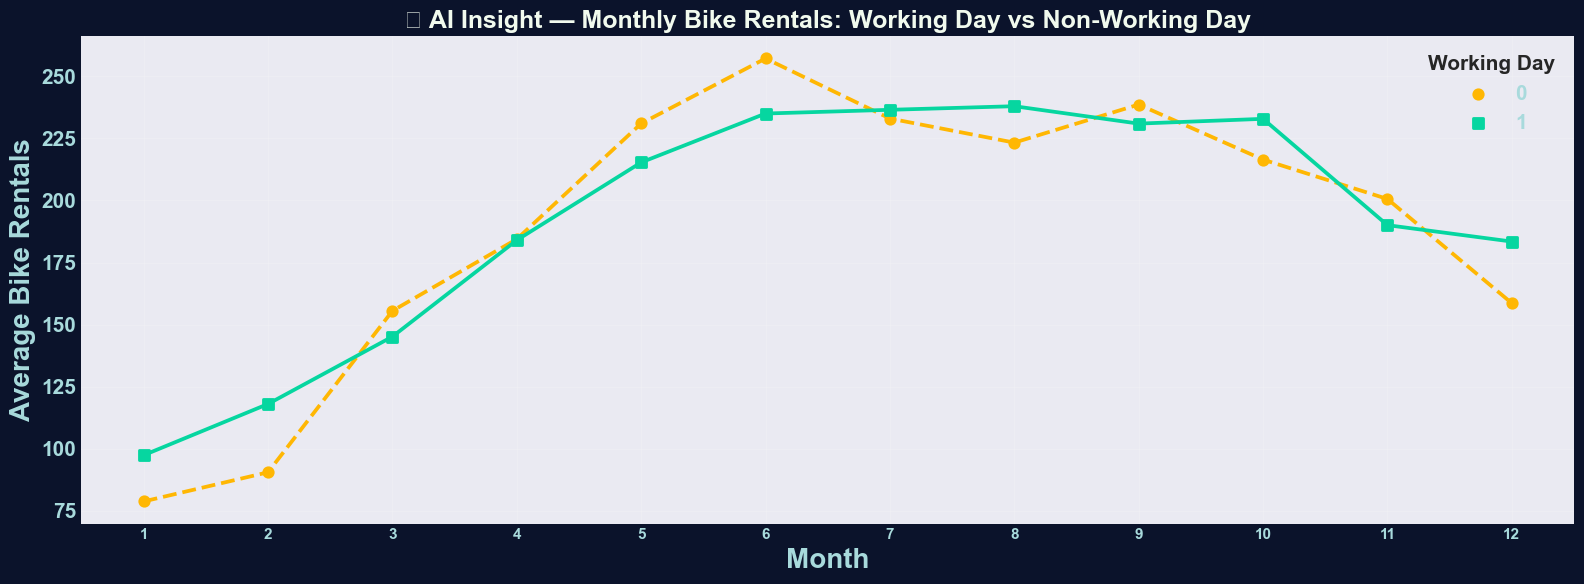

In [124]:
# 1) AI-Style: Bike Rental Trend by Month (Working Day vs Non-Working Day)
plt.style.use('seaborn-v0_8-darkgrid')
plt.figure(figsize=(16,6), facecolor='#0B132B')

hist_color = '#00E5FF'    # neon cyan
line_color = '#06D6A0'    # bright green for lines and markers
text_color = '#A8DADC'    # axis text
title_color = '#F1FAEE'   # title text

# Ensure month ordering (if Month is numeric)
month_order = sorted(df['Month'].dropna().unique())

sns.pointplot(x='Month', y='count', hue='workingday', data=df, ci=None,
              palette={0: '#FFB703', 1: '#06D6A0'}, markers=['o','s'], linestyles=['--','-'],
              order=month_order)

plt.title('🤖 AI Insight — Monthly Bike Rentals: Working Day vs Non-Working Day', fontsize=18, fontweight='bold', color=title_color)
plt.xlabel('Month', color=text_color)
plt.ylabel('Average Bike Rentals', color=text_color)
plt.xticks(fontsize=11, color=text_color)
plt.yticks(color=text_color)
plt.legend(title='Working Day', facecolor='#0B132B', edgecolor='#1D3557', labelcolor=text_color)
plt.grid(alpha=0.15)
plt.tight_layout()
plt.show()


**Observations:**

- **Bike rentals are noticeably higher during specific months, showing strong seasonal demand patterns.**
- **Working days record higher rental counts than non-working days, suggesting bikes are mainly used for commuting.**
- **Rental activity tends to decrease during colder or rainy months, aligning with unfavorable weather conditions.**
- **The difference between working and non-working day rentals highlights user behavior and potential for targeted service planning.**


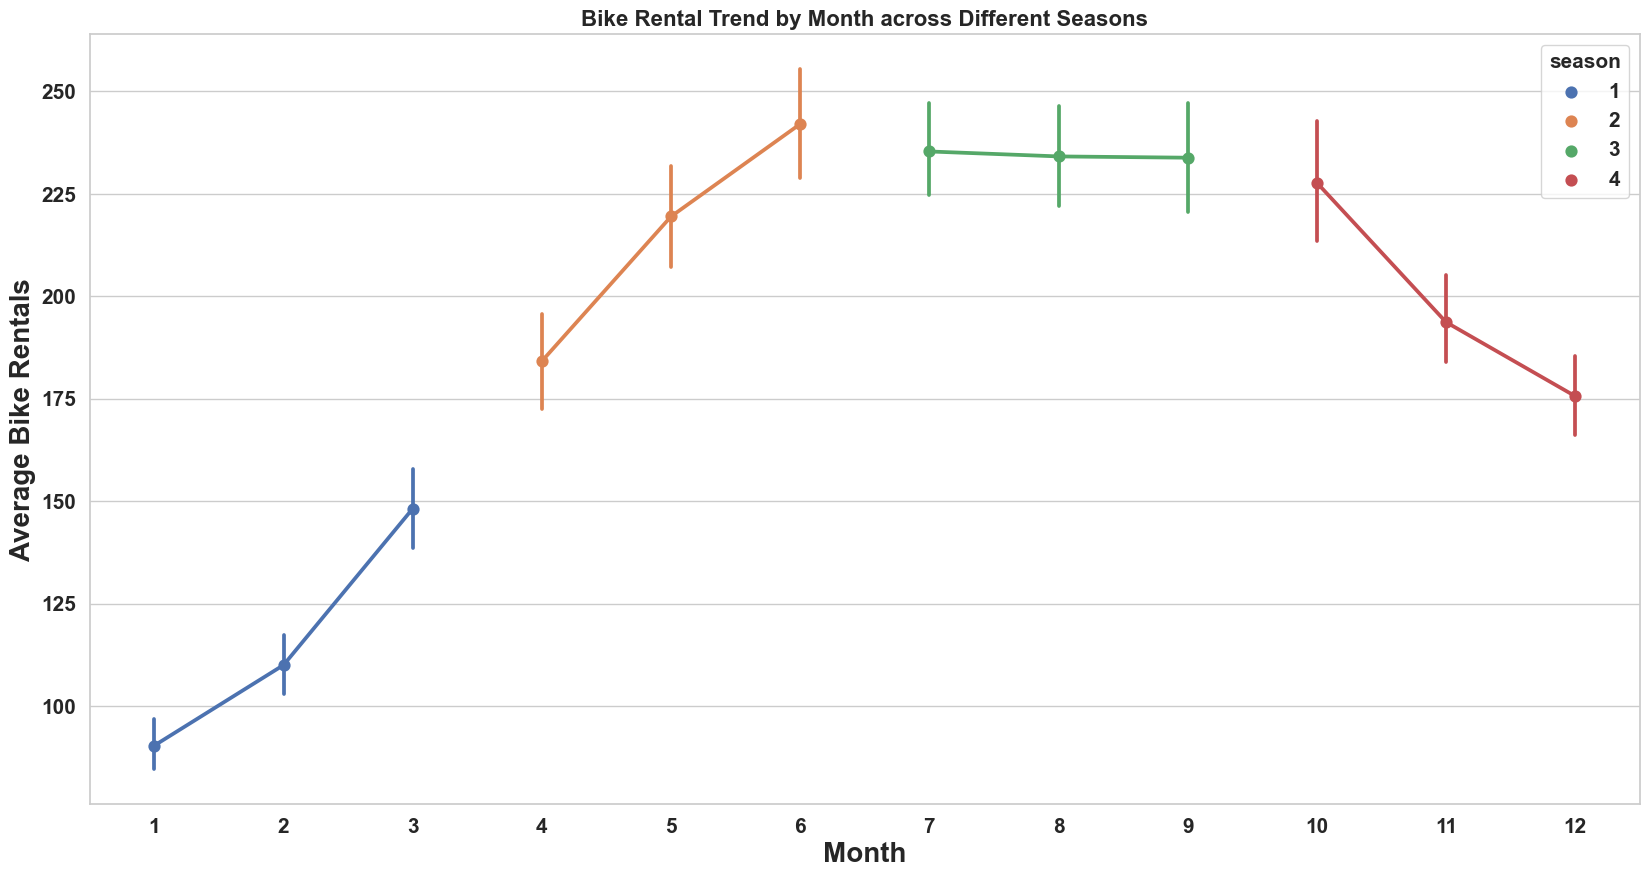

In [116]:
# Bike Rental trend with respect to Month on Seasons
plt.figure(figsize=(20, 10))
sns.pointplot(x='Month', y='count', hue='season', data=df)
plt.title("Bike Rental Trend by Month across Different Seasons", fontsize=16)
plt.xlabel("Month")
plt.ylabel("Average Bike Rentals")
plt.show()


**Observations:**

- **Bike rentals show a clear seasonal pattern, increasing during warmer months (summer/spring).**
- **Lower rentals are observed during colder or monsoon months, likely due to unfavorable weather.**
- **The trend indicates that weather conditions significantly influence the overall rental demand.**
- **Understanding seasonal effects helps optimize bike availability and maintenance schedules.**


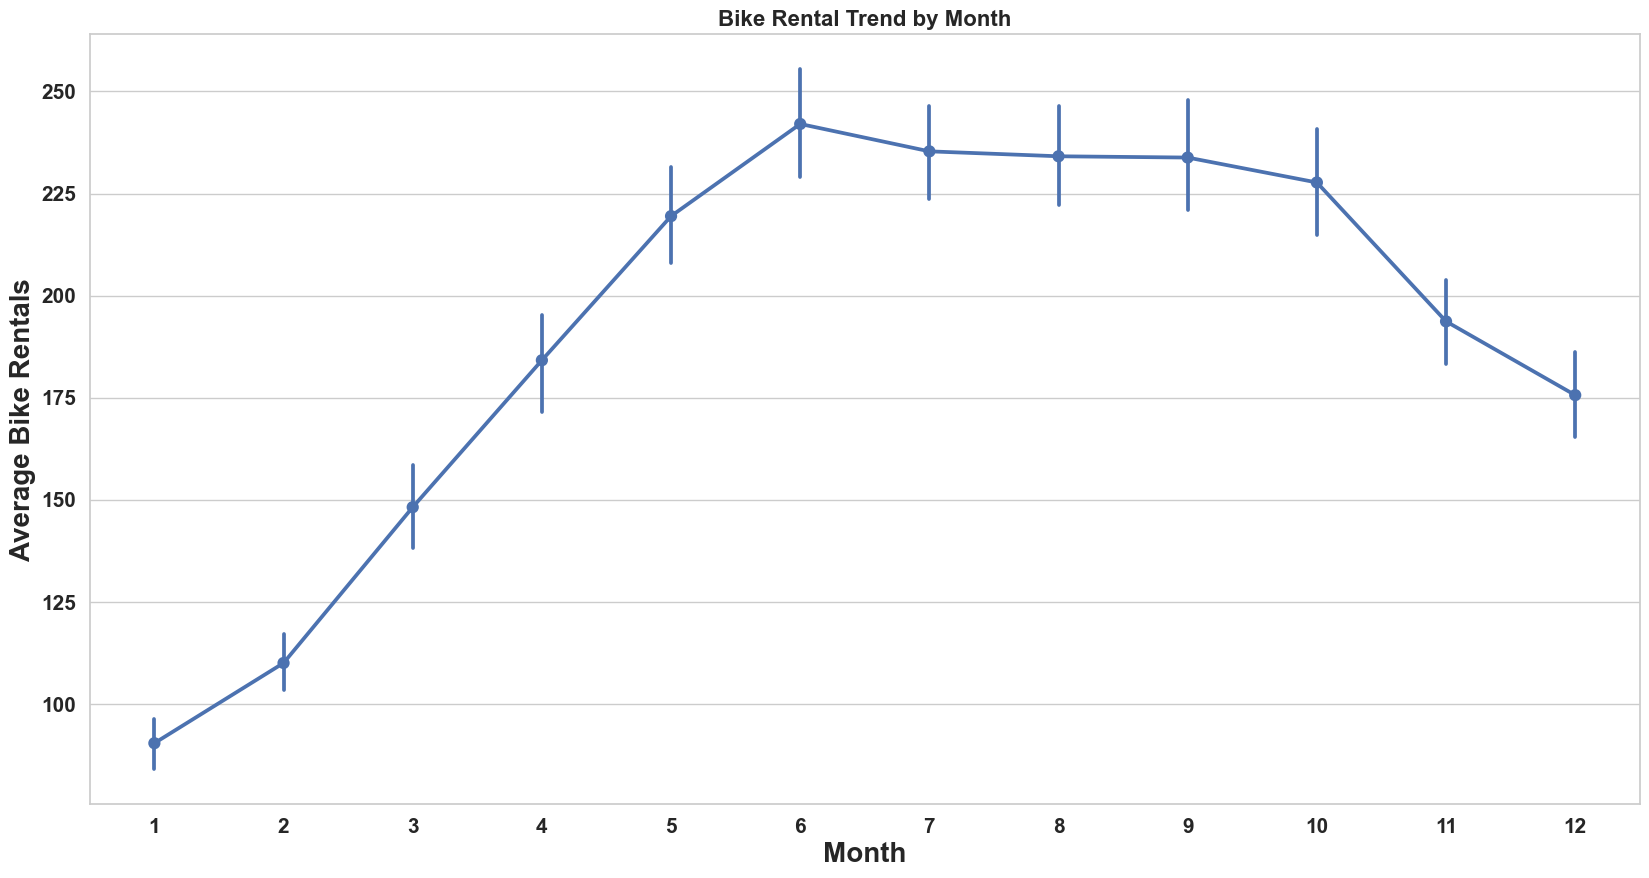

In [117]:
# Bike Rental trend with respect to Month
plt.figure(figsize=(20, 10))
sns.pointplot(x='Month', y='count', data=df)
plt.title("Bike Rental Trend by Month", fontsize=16)
plt.xlabel("Month")
plt.ylabel("Average Bike Rentals")
plt.show()


**Observations:**

- **A steady rise in bike rentals is seen during mid-year months, reflecting increased outdoor and commuting activities.**
- **Colder months show a clear dip in rentals, likely due to less favorable riding conditions.**
- **The pattern emphasizes strong seasonality in user behavior, aligning with temperature and daylight variations.**
- **This month-wise demand pattern can guide operational planning, such as maintenance scheduling and inventory management.**
- **Predicting monthly demand fluctuations helps optimize revenue and reduce idle resources during low-demand periods.**


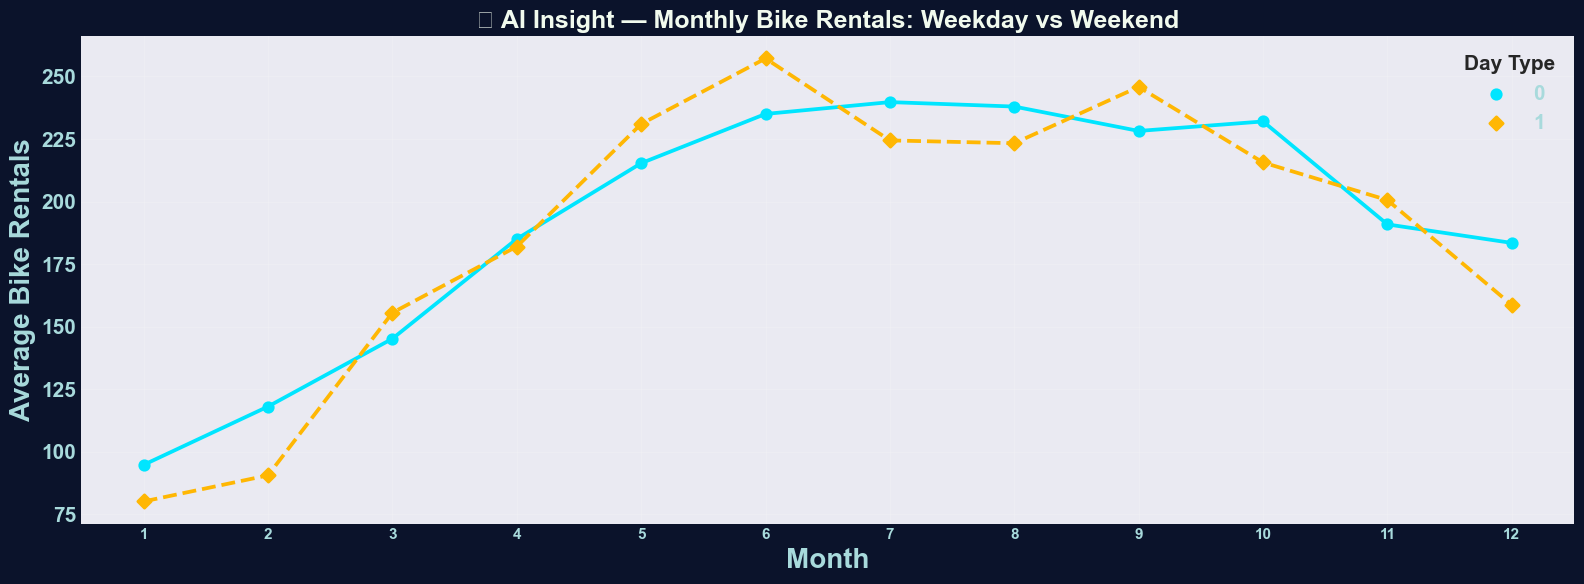

In [125]:
# 2) AI-Style: Bike Rental Trend by Month (Weekdays vs Weekends)
plt.style.use('seaborn-v0_8-darkgrid')
plt.figure(figsize=(16,6), facecolor='#0B132B')

# Month order reuse
month_order = sorted(df['Month'].dropna().unique())

sns.pointplot(x='Month', y='count', hue='Weekdays_or_weekend', data=df, ci=None,
              palette={'Weekday':'#00E5FF', 'Weekend':'#FFB703'} if df['Weekdays_or_weekend'].dtype == object else {0:'#00E5FF',1:'#FFB703'},
              order=month_order, markers=['o','D'], linestyles=['-','--'])

plt.title('🤖 AI Insight — Monthly Bike Rentals: Weekday vs Weekend', fontsize=18, fontweight='bold', color=title_color)
plt.xlabel('Month', color=text_color)
plt.ylabel('Average Bike Rentals', color=text_color)
plt.xticks(fontsize=11, color=text_color)
plt.yticks(color=text_color)
plt.legend(title='Day Type', facecolor='#0B132B', edgecolor='#1D3557', labelcolor=text_color)
plt.grid(alpha=0.15)
plt.tight_layout()
plt.show()


# **📊 Distribution of Target Variable**


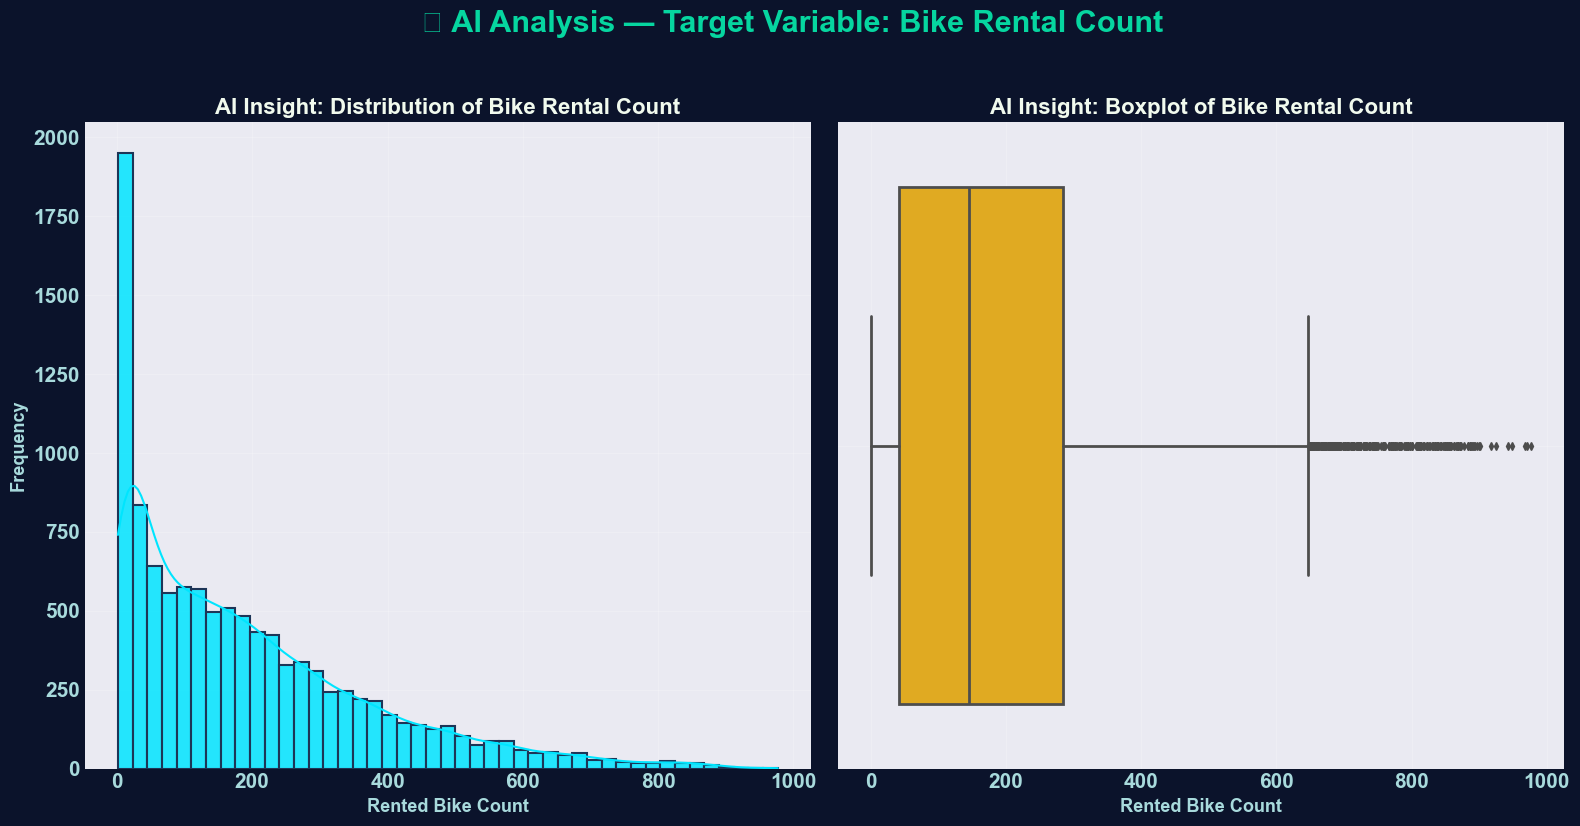

In [126]:
# AI-Inspired Visualization: Distribution of Target Variable - "Bike Rental Count"

plt.style.use('seaborn-v0_8-darkgrid')
f, axes = plt.subplots(1, 2, figsize=(16, 8), facecolor='#0B132B')

# AI color palette
hist_color = '#00E5FF'    # neon cyan
box_color = '#FFB703'     # warm amber
title_color = '#F1FAEE'   # soft white-blue

# Distribution Plot
sns.histplot(x=df['count'], kde=True, color=hist_color, ax=axes[0], alpha=0.85, edgecolor='#1D3557', linewidth=1.5)
axes[0].set_title('AI Insight: Distribution of Bike Rental Count', fontsize=16, fontweight='bold', color=title_color)
axes[0].set_xlabel('Rented Bike Count', fontsize=13, color='#A8DADC')
axes[0].set_ylabel('Frequency', fontsize=13, color='#A8DADC')
axes[0].tick_params(colors='#A8DADC')
axes[0].grid(alpha=0.2)

# Box Plot
sns.boxplot(x=df['count'], color=box_color, ax=axes[1], fliersize=4, linewidth=2)
axes[1].set_title('AI Insight: Boxplot of Bike Rental Count', fontsize=16, fontweight='bold', color=title_color)
axes[1].set_xlabel('Rented Bike Count', fontsize=13, color='#A8DADC')
axes[1].tick_params(colors='#A8DADC')
axes[1].grid(alpha=0.2)

# Main Title
plt.suptitle('🤖 AI Analysis — Target Variable: Bike Rental Count', fontsize=22, fontweight='bold', color='#06D6A0', y=1.03)

plt.tight_layout()
plt.show()

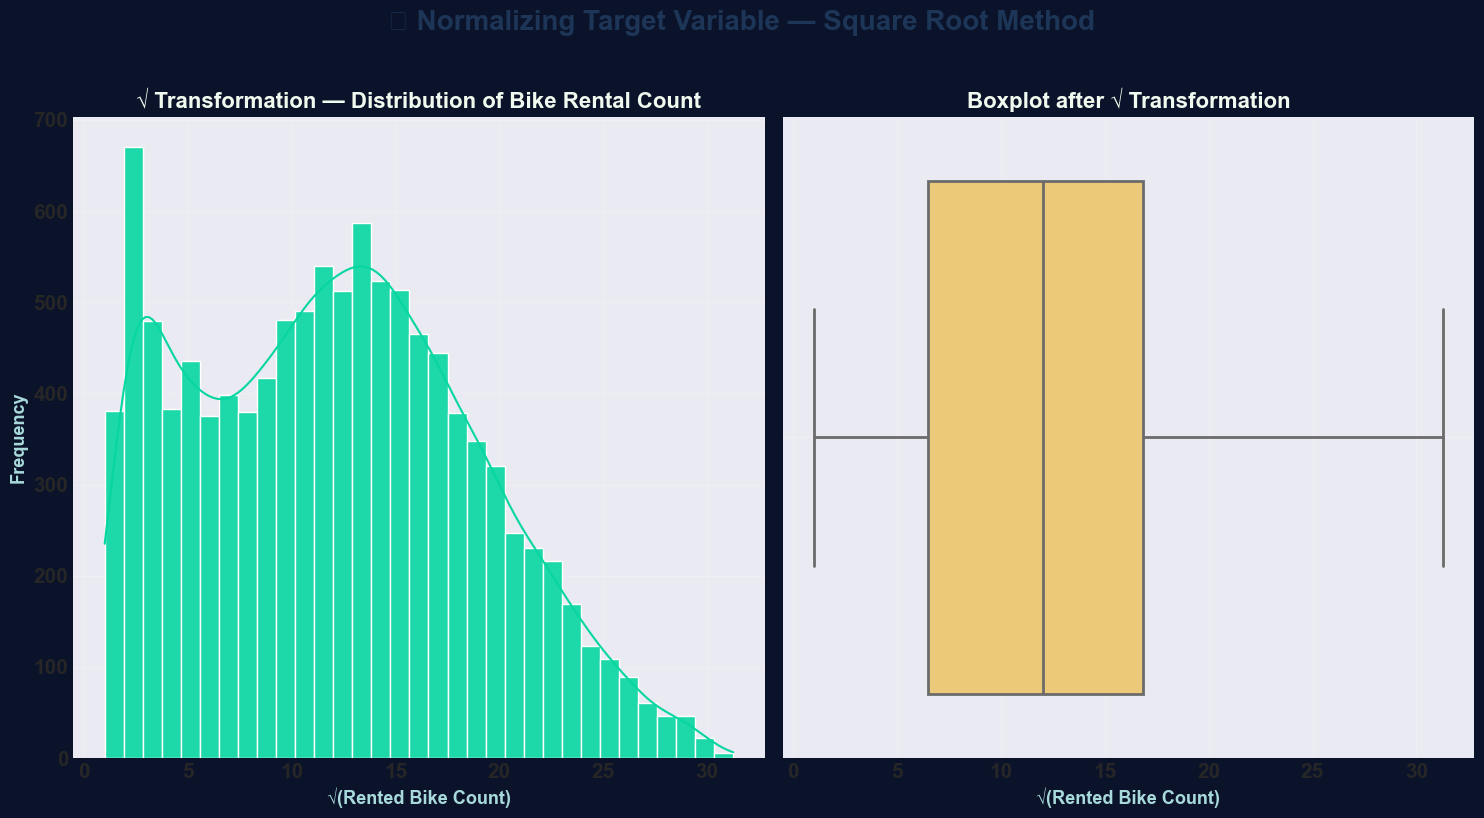

In [127]:
# AI-Style Visualization: Normalizing Target Variable using Square Root Method
f, axes = plt.subplots(1, 2, figsize=(15, 8), facecolor='#0B132B')

# Square root transformation
sqrt_rentals = np.sqrt(df['count'])

# Distribution plot with smooth curve
sns.histplot(x=sqrt_rentals, kde=True, color='#06D6A0', ax=axes[0], alpha=0.9)
axes[0].set_title('√ Transformation — Distribution of Bike Rental Count', fontsize=16, fontweight='bold', color='#F1FAEE')
axes[0].set_xlabel('√(Rented Bike Count)', fontsize=13, color='#A8DADC')
axes[0].set_ylabel('Frequency', fontsize=13, color='#A8DADC')
axes[0].grid(alpha=0.2)

# Box plot for normalized variable
sns.boxplot(x=sqrt_rentals, color='#FFD166', ax=axes[1], fliersize=4, linewidth=2)
axes[1].set_title('Boxplot after √ Transformation', fontsize=16, fontweight='bold', color='#F1FAEE')
axes[1].set_xlabel('√(Rented Bike Count)', fontsize=13, color='#A8DADC')
axes[1].grid(alpha=0.2)

# Add overall title
plt.suptitle('📊 Normalizing Target Variable — Square Root Method', fontsize=20, fontweight='bold', color='#1D3557', y=1.02)

plt.tight_layout()
plt.show()

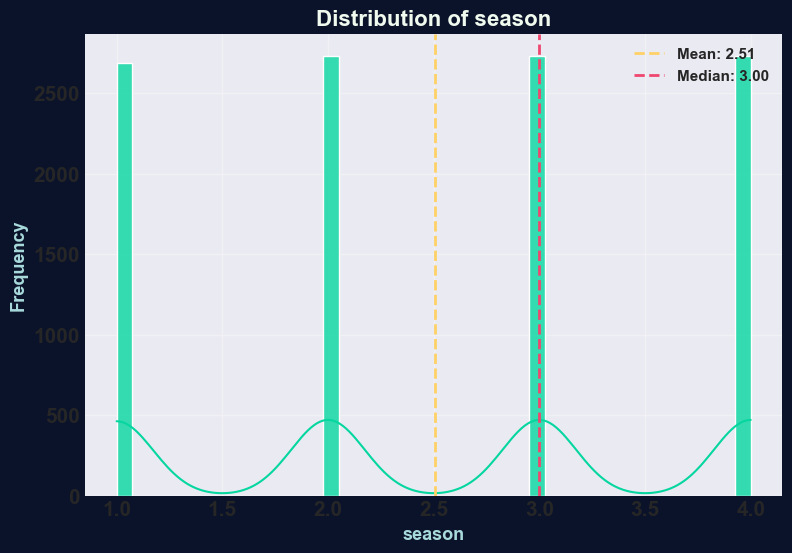

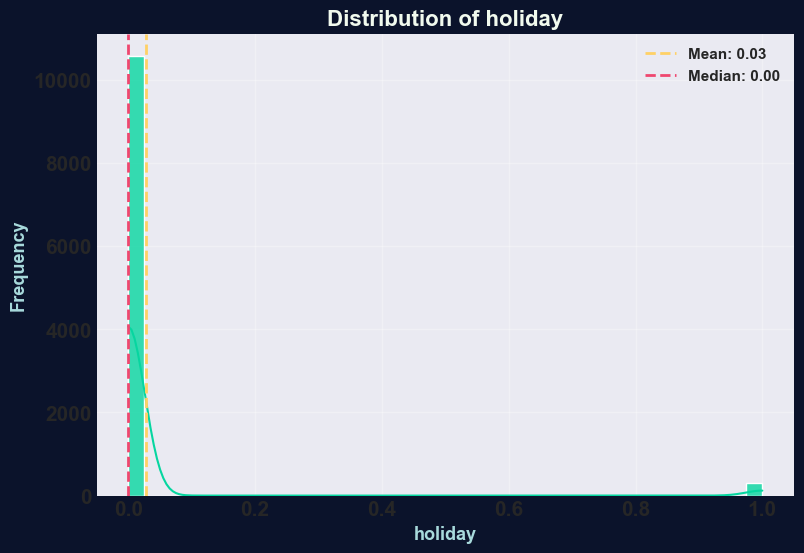

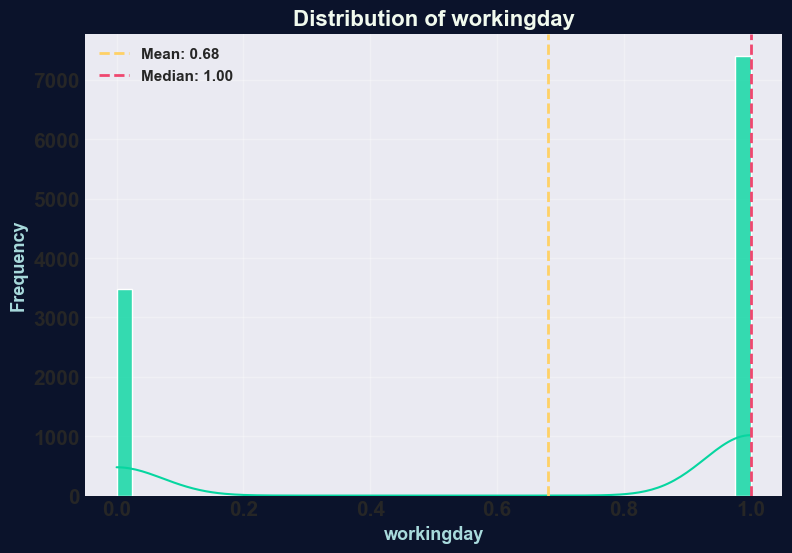

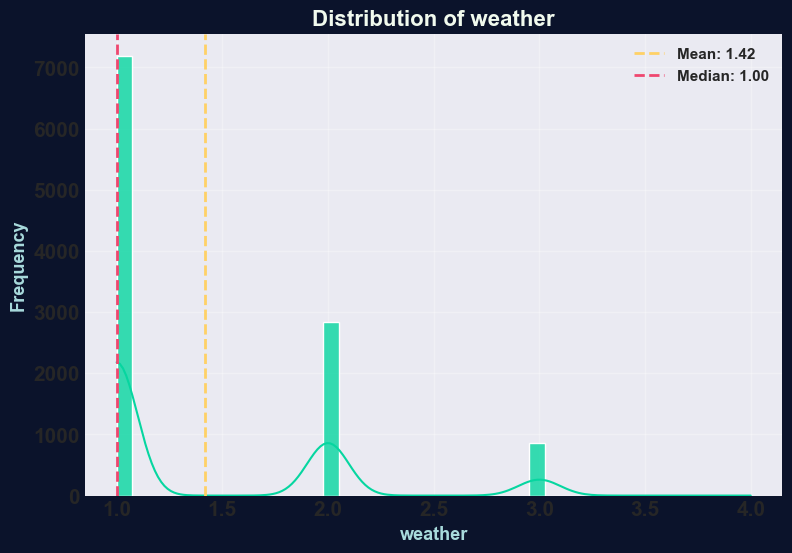

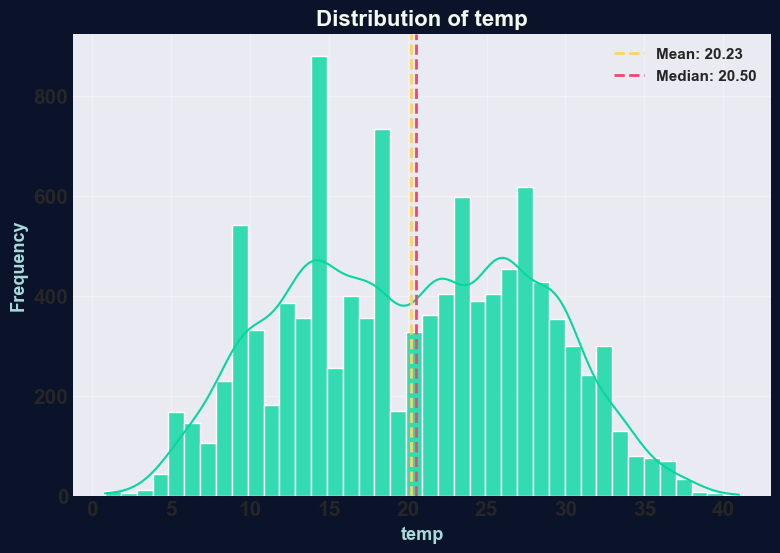

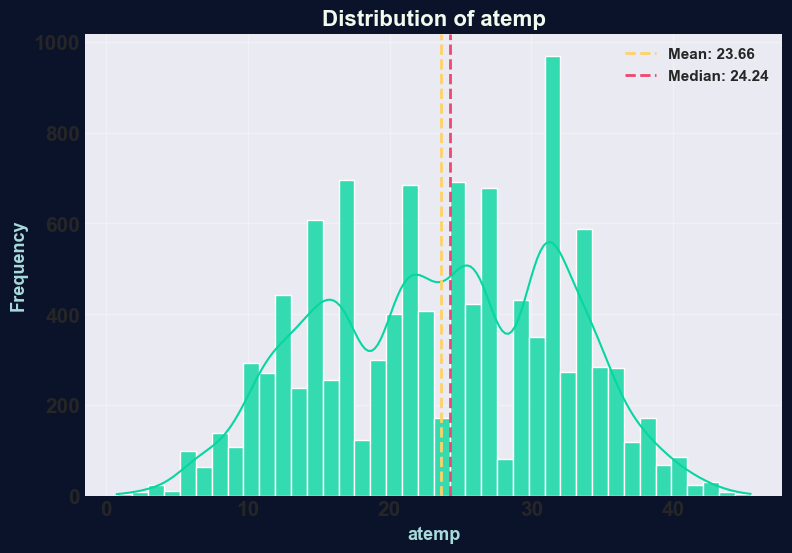

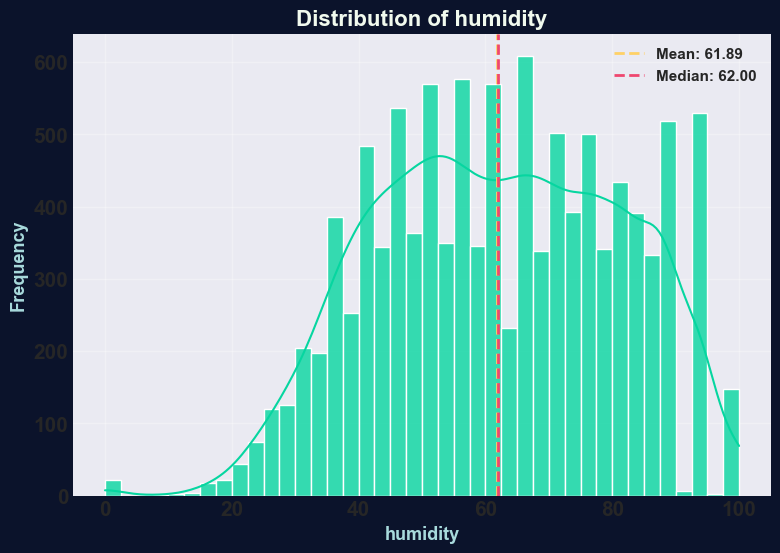

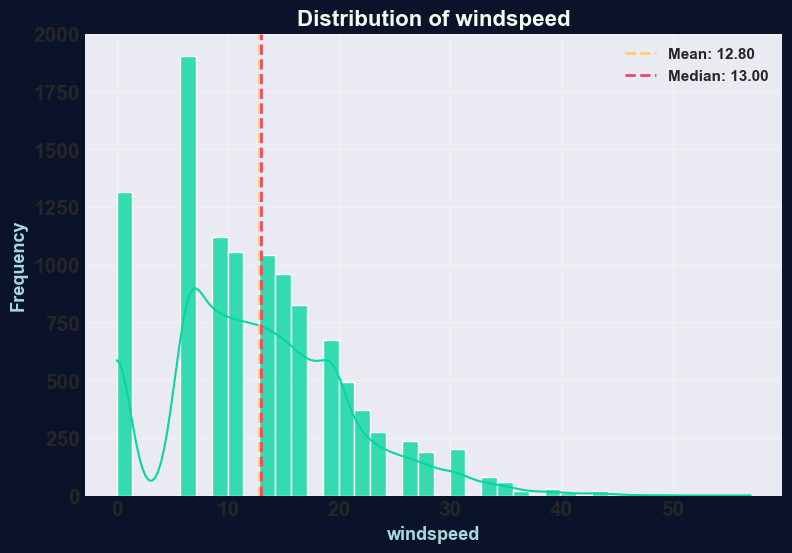

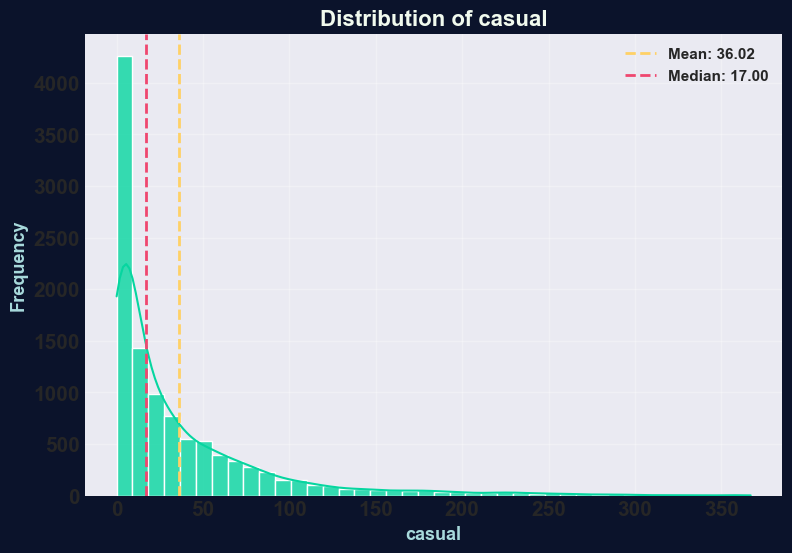

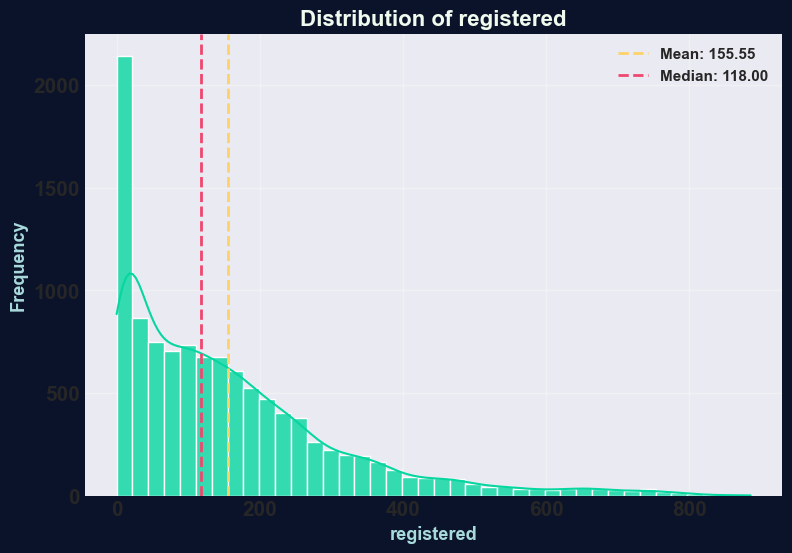

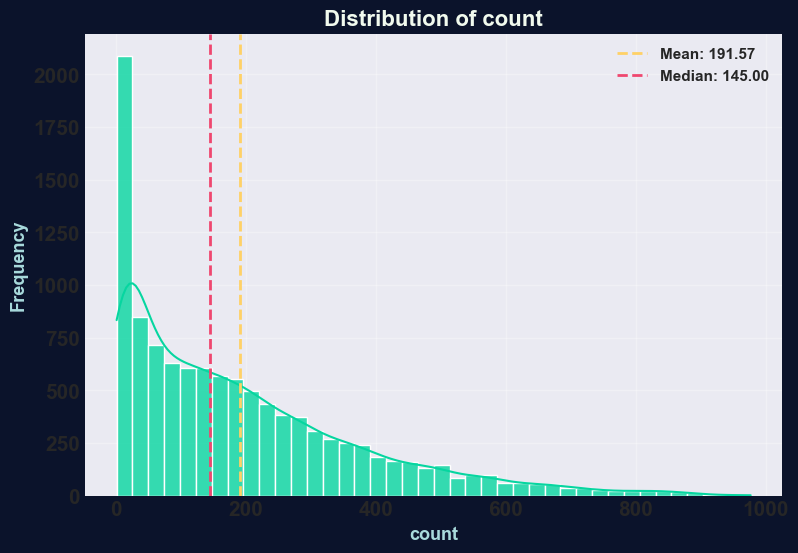

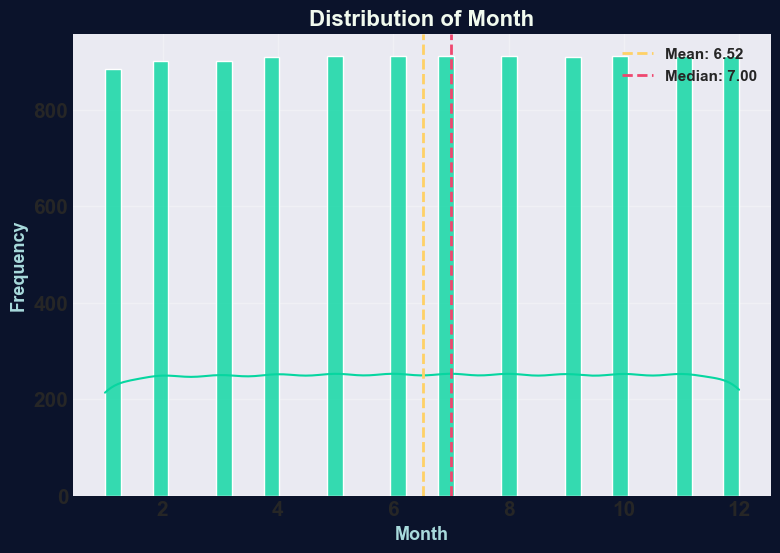

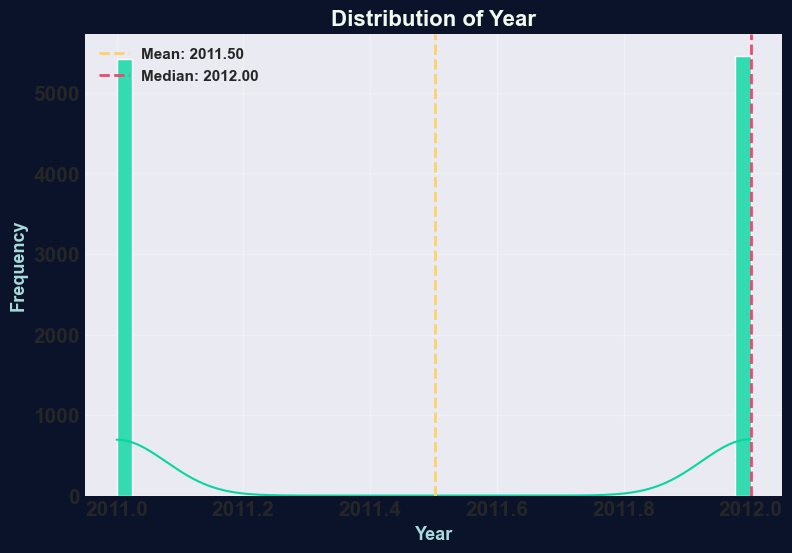

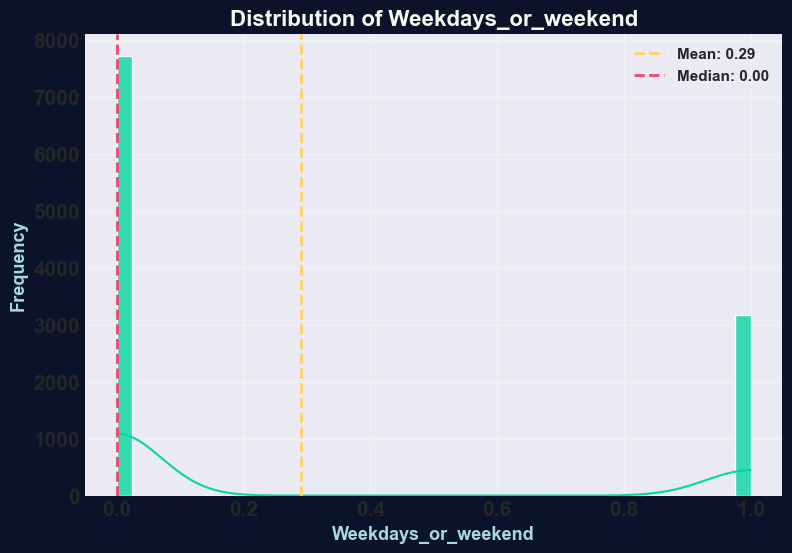

In [128]:
# AI-Enhanced Visualization for Numeric Feature Distributions
for col in numeric_features:
    plt.figure(figsize=(9, 6), facecolor='#0B132B')
    feature = df[col]

    # Histogram with AI-style theme
    sns.histplot(feature, bins=40, kde=True, color='#06D6A0', alpha=0.8)
    
    # Mean and Median lines
    plt.axvline(feature.mean(), color='#FFD166', linestyle='--', linewidth=2, label=f'Mean: {feature.mean():.2f}')
    plt.axvline(feature.median(), color='#EF476F', linestyle='--', linewidth=2, label=f'Median: {feature.median():.2f}')
    
    # Title and labels
    plt.title(f'Distribution of {col}', fontsize=16, fontweight='bold', color='#F1FAEE')
    plt.xlabel(col, fontsize=13, color='#A8DADC')
    plt.ylabel('Frequency', fontsize=13, color='#A8DADC')
    plt.legend(facecolor='#1D3557', fontsize=11)
    plt.grid(alpha=0.3)
    plt.show()

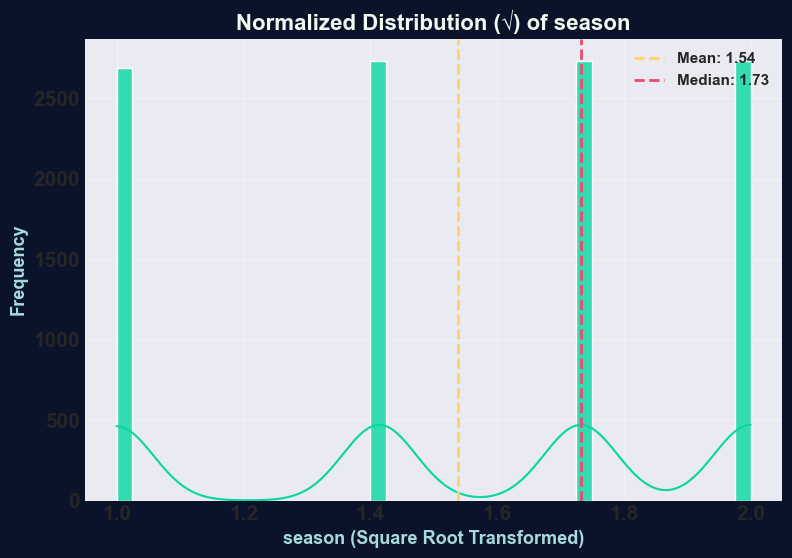

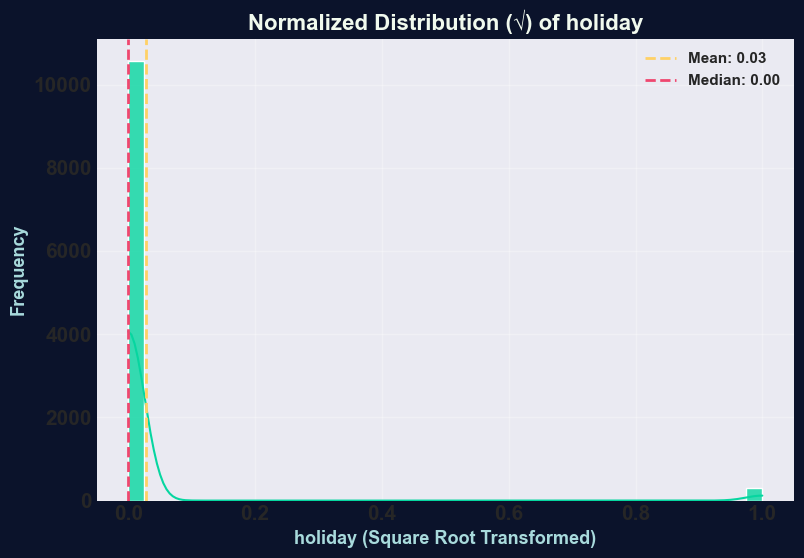

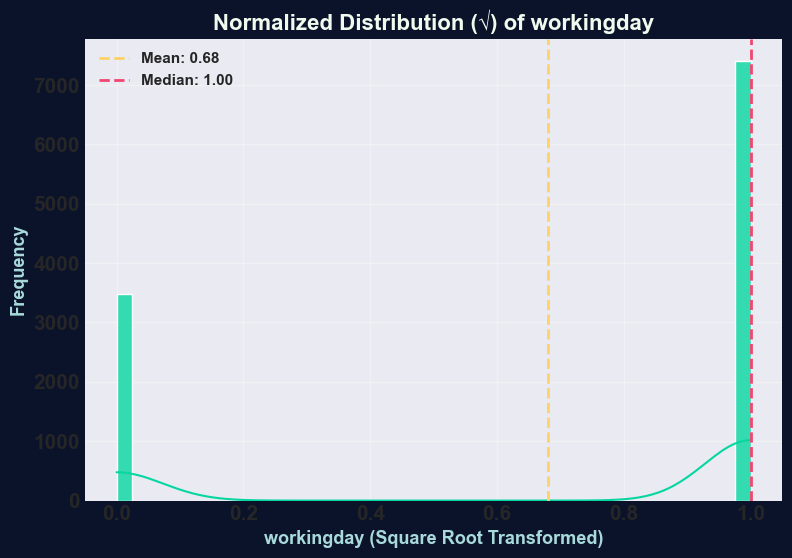

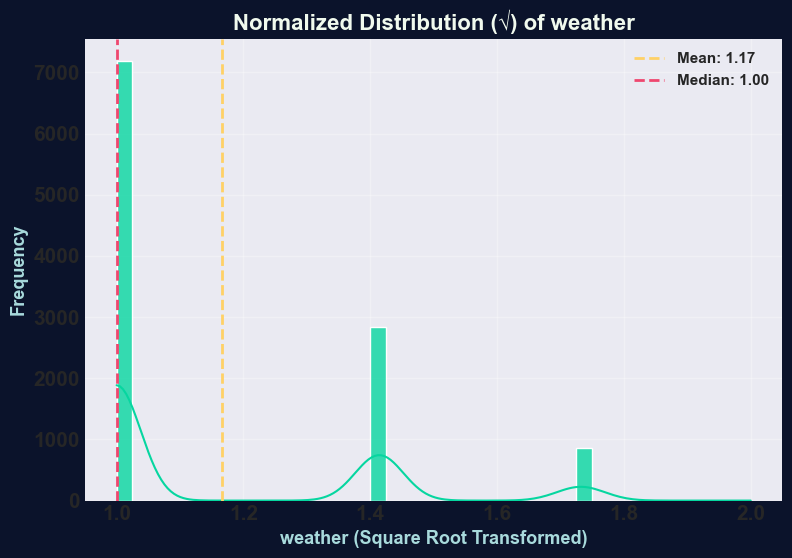

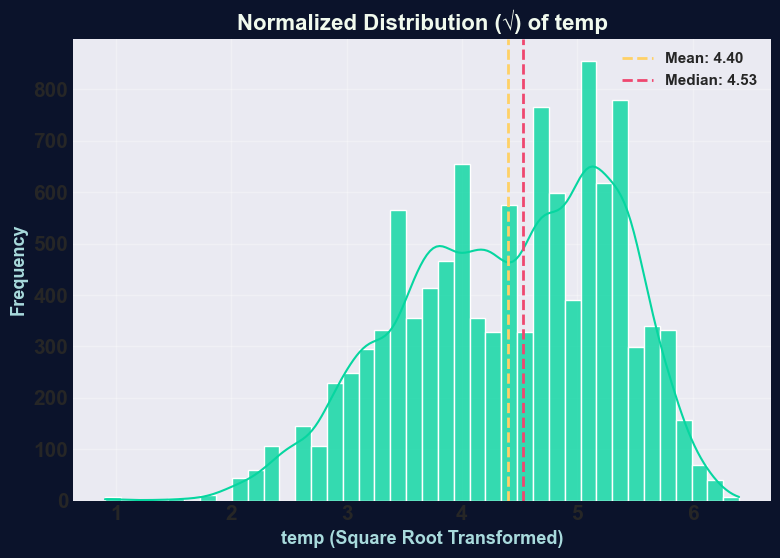

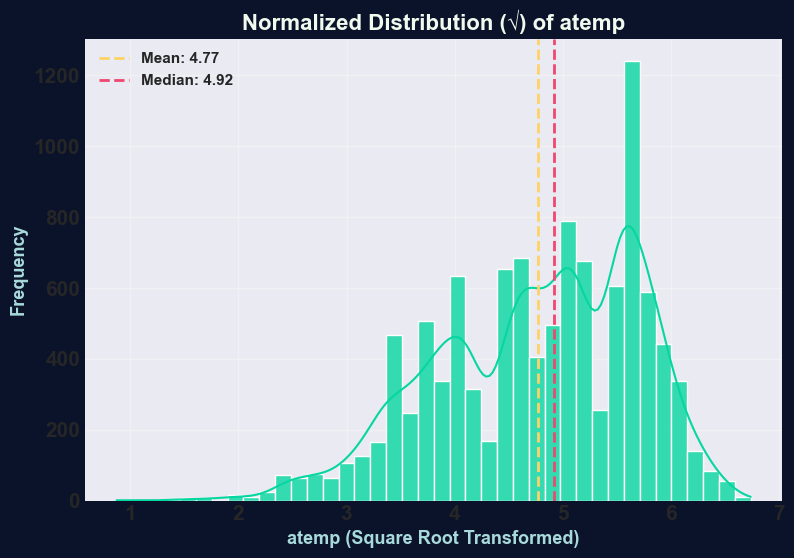

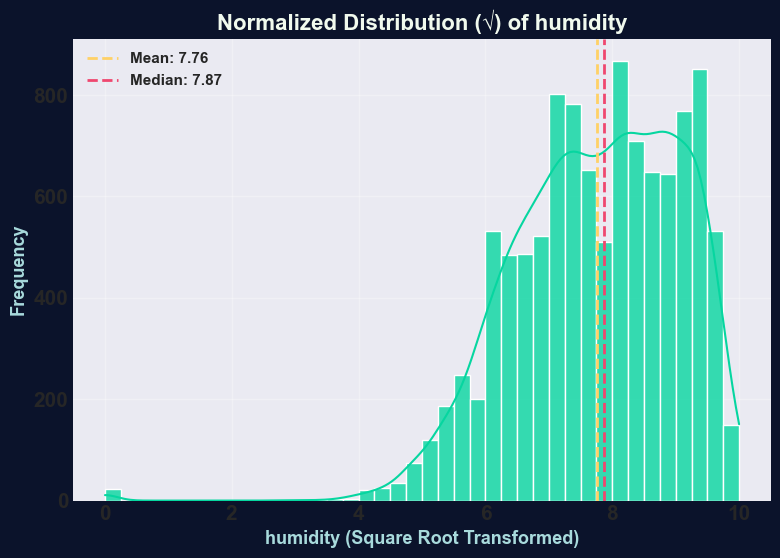

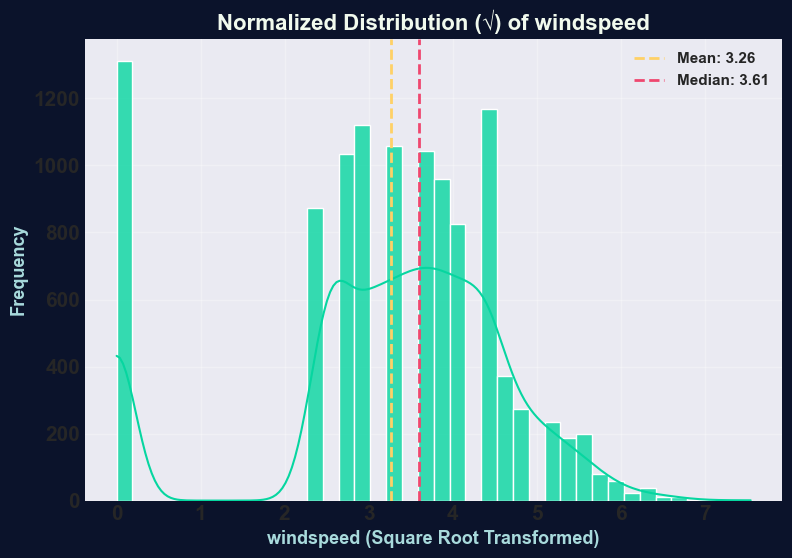

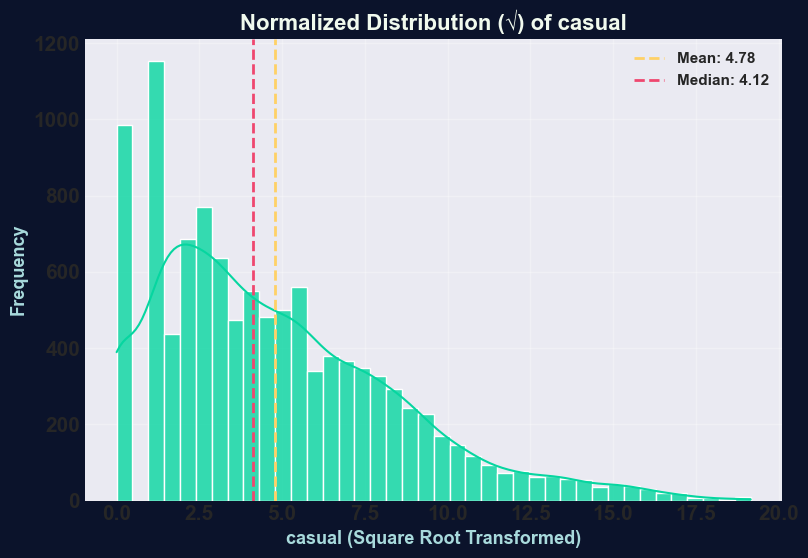

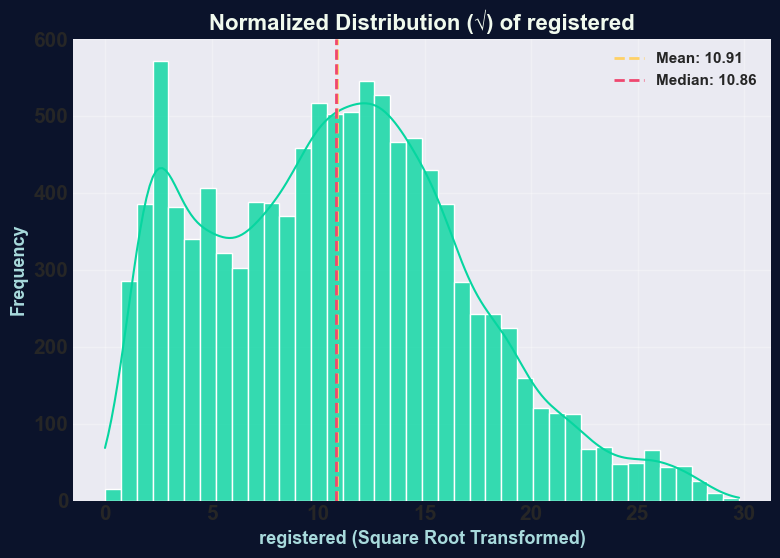

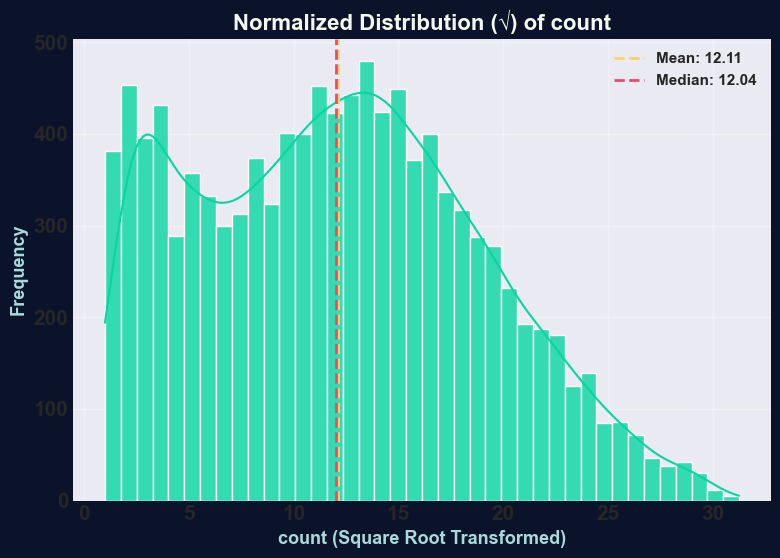

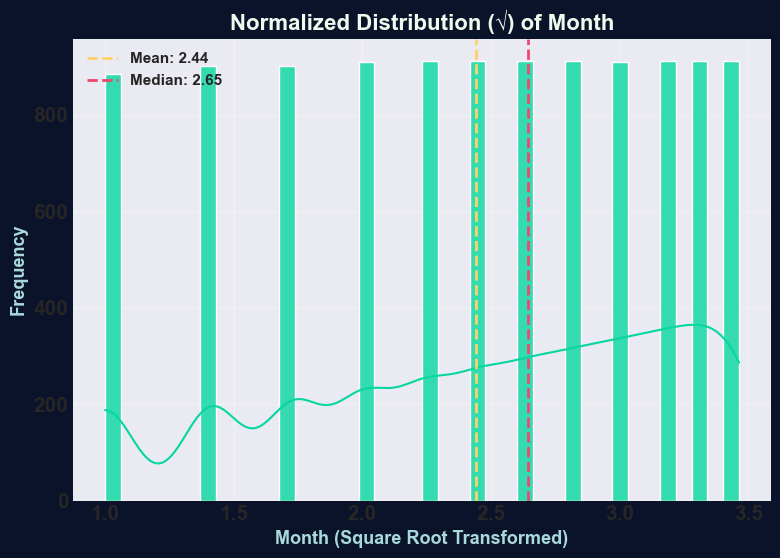

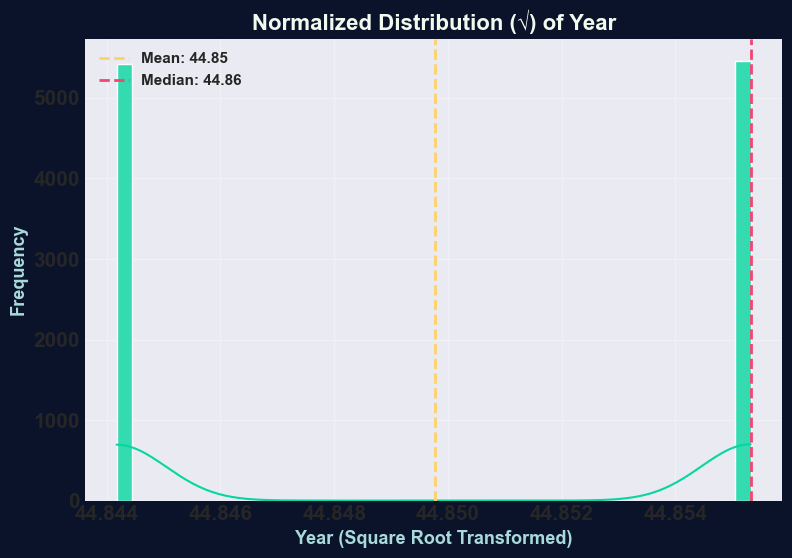

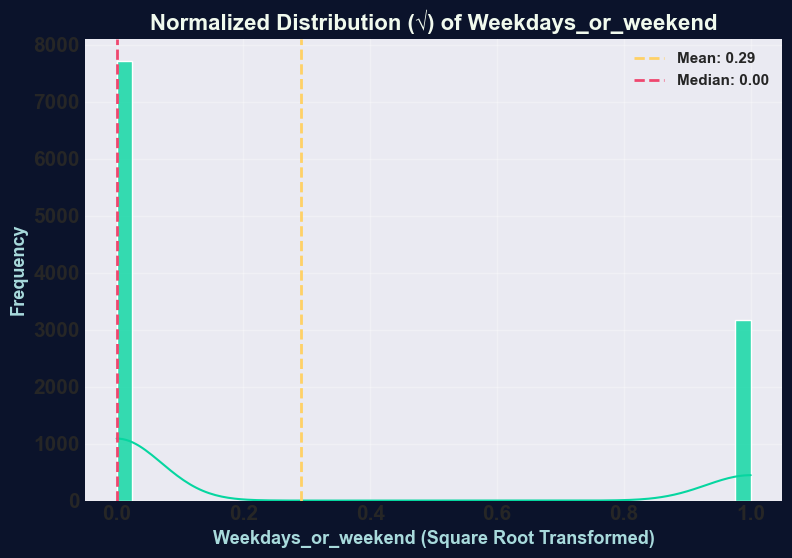

In [129]:
# Normalizing the Variables using Square Root Method (AI-Enhanced Visualization)
for col in numeric_features:
    plt.figure(figsize=(9, 6), facecolor='#0B132B')
    feature = np.sqrt(df[col])

    # Histogram with KDE for smoother visualization
    sns.histplot(feature, bins=40, kde=True, color='#06D6A0', alpha=0.8)

    # Mean and Median indicators
    plt.axvline(feature.mean(), color='#FFD166', linestyle='--', linewidth=2, label=f'Mean: {feature.mean():.2f}')
    plt.axvline(feature.median(), color='#EF476F', linestyle='--', linewidth=2, label=f'Median: {feature.median():.2f}')

    # Titles and labels
    plt.title(f'Normalized Distribution (√) of {col}', fontsize=16, fontweight='bold', color='#F1FAEE')
    plt.xlabel(f'{col} (Square Root Transformed)', fontsize=13, color='#A8DADC')
    plt.ylabel('Frequency', fontsize=13, color='#A8DADC')
    plt.legend(facecolor='#1D3557', fontsize=11)
    plt.grid(alpha=0.3)
    plt.show()

# <span style="color:#1D3557; font-size:40px; font-weight:bold;">📊 Bivariate Analysis</span>


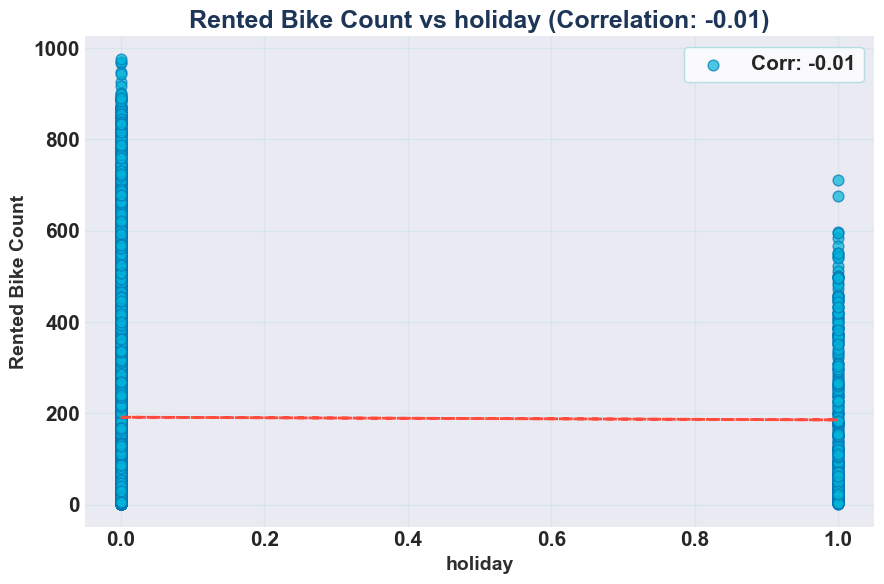

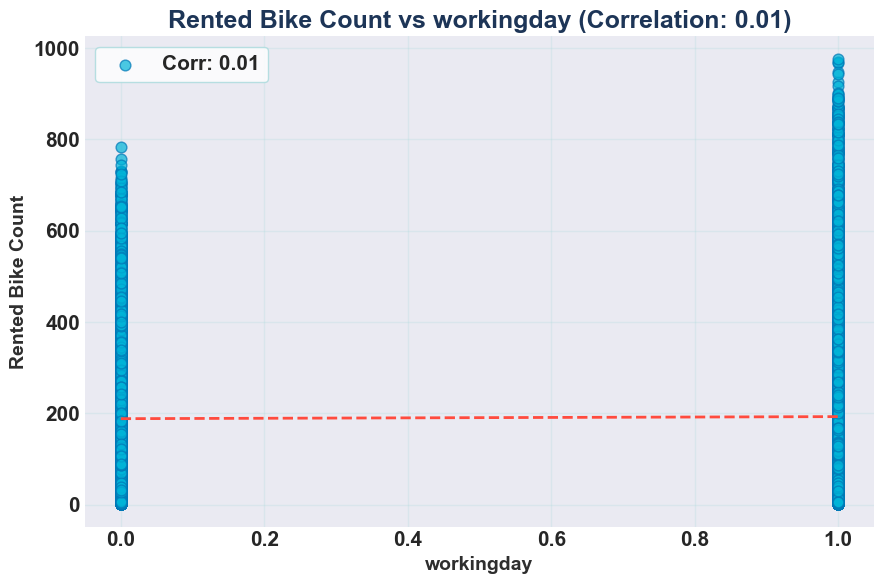

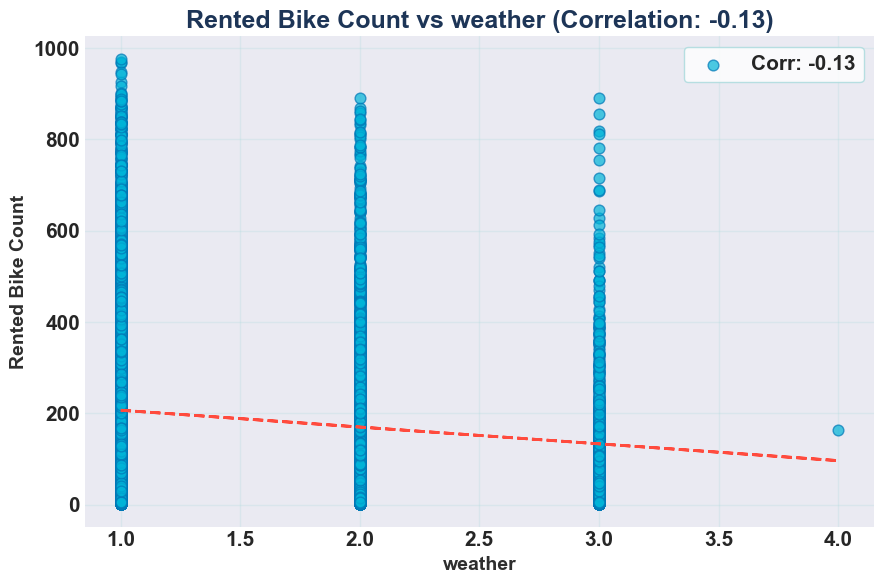

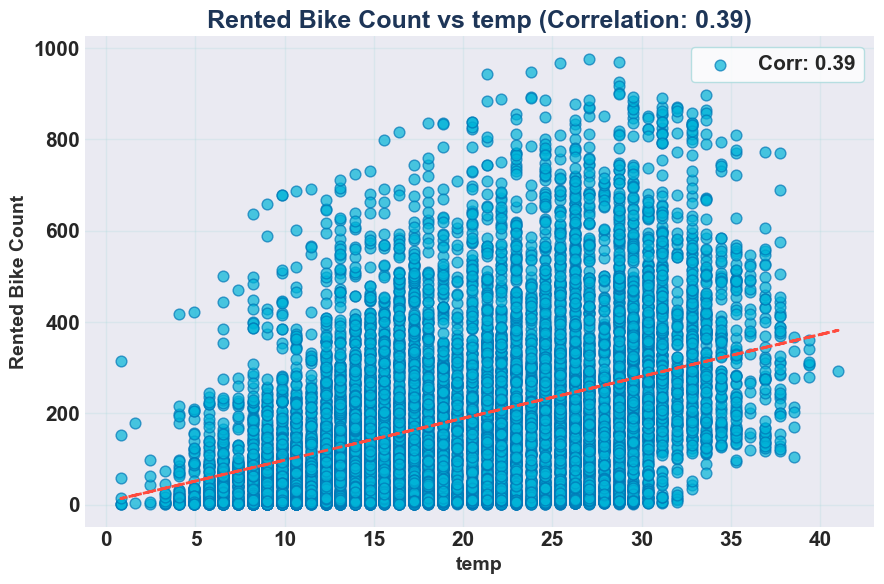

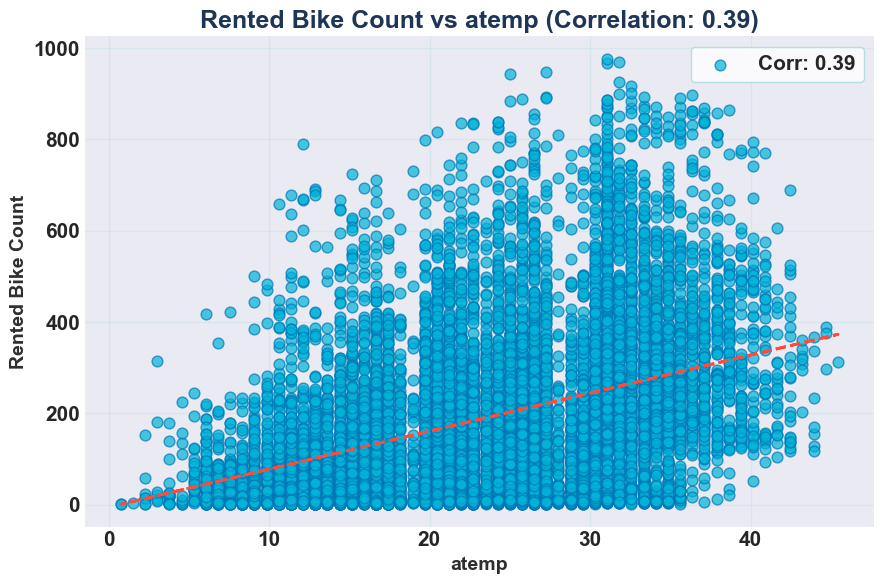

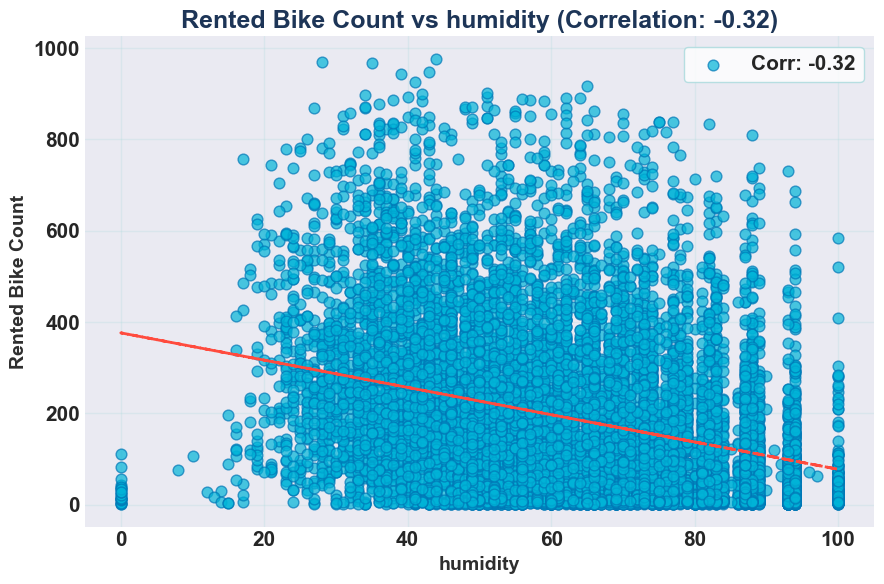

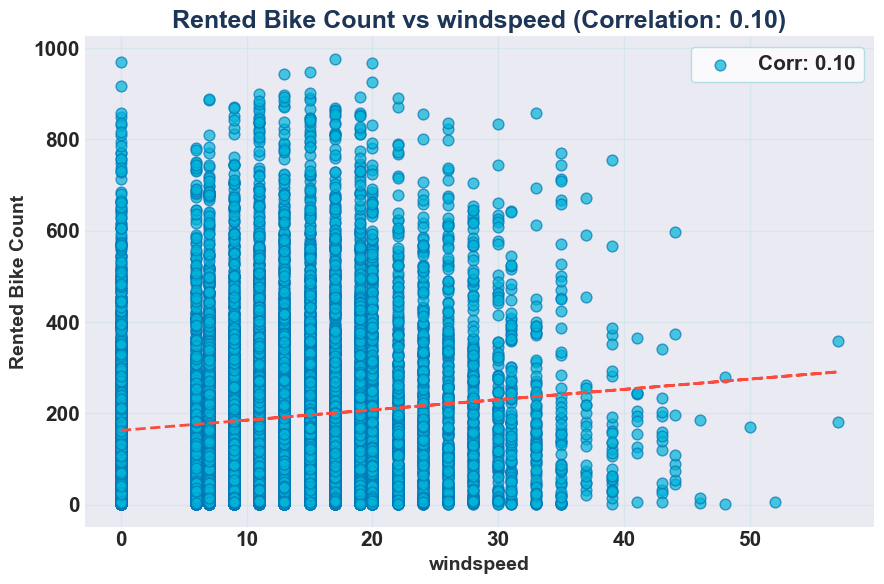

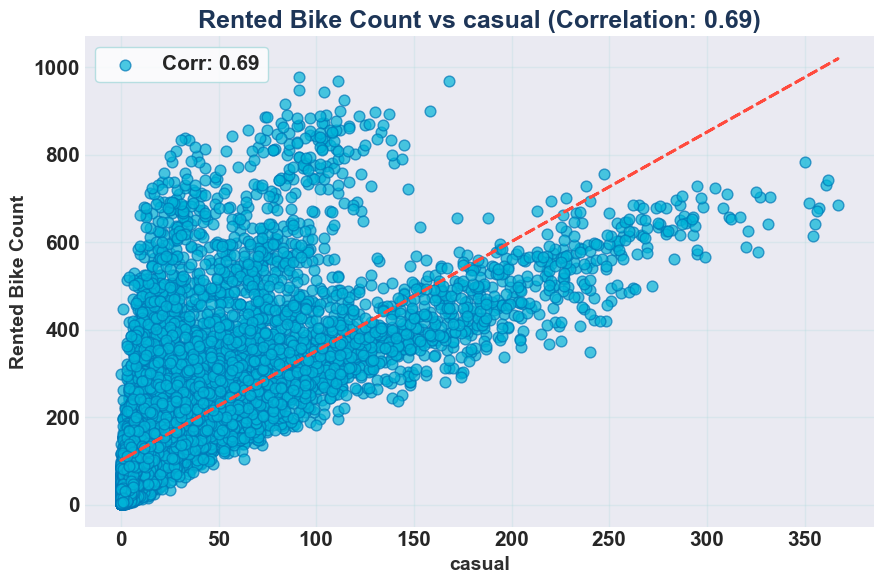

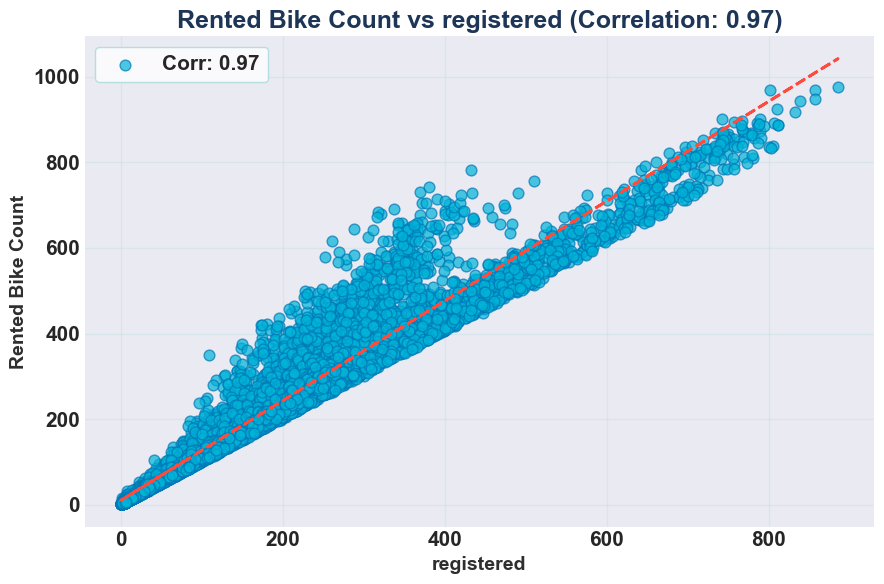

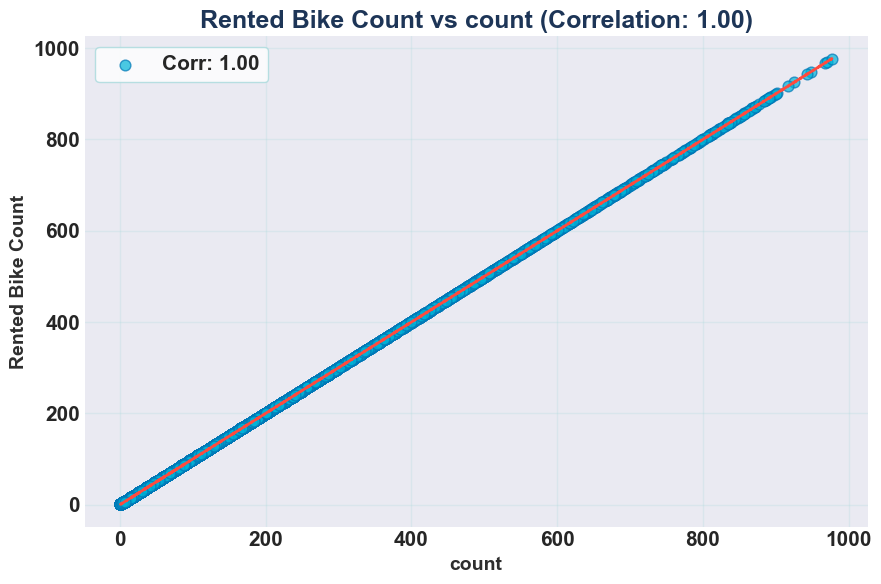

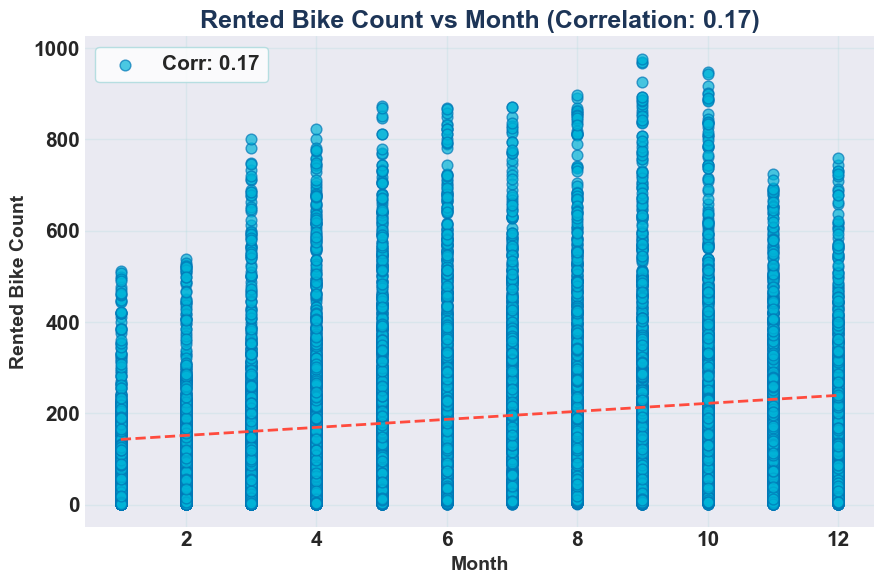

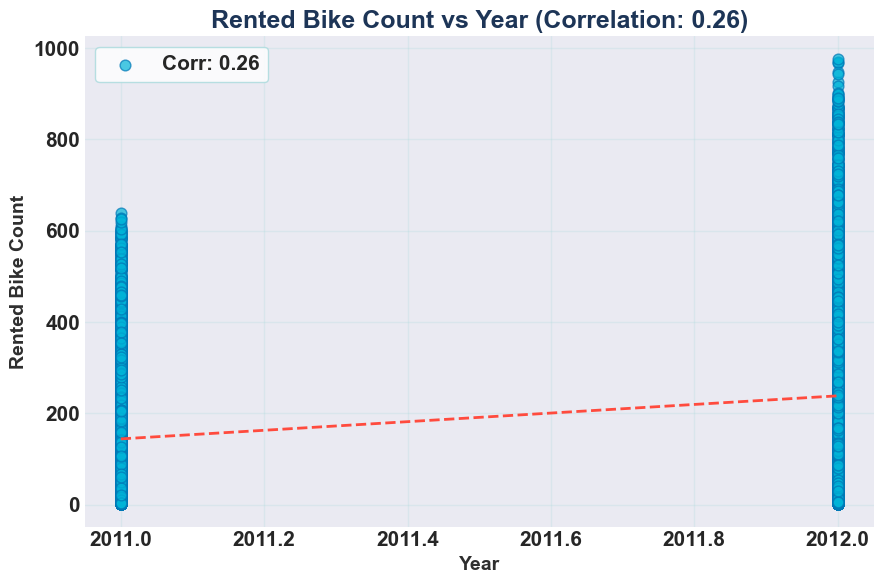

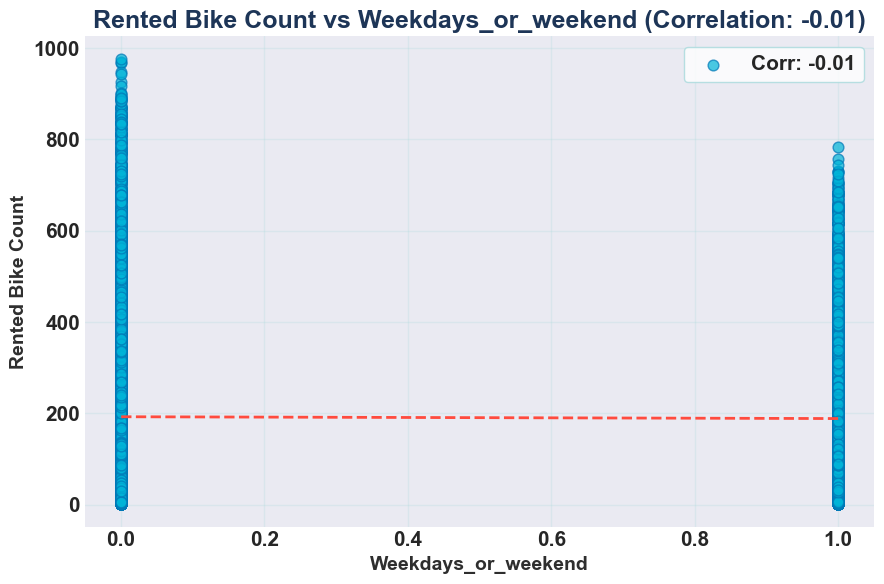

In [132]:
for col in numeric_features[1:]:
    plt.figure(figsize=(9, 6))
    feature = df[col]
    target = df['count']
    correlation = feature.corr(target)

    # AI-styled Scatter plot
    plt.scatter(feature, target, alpha=0.7, color='#00B4D8', edgecolors='#0077B6', s=60, label=f'Corr: {correlation:.2f}')

    # Regression trend line
    z = np.polyfit(feature, target, 1)
    y_hat = np.poly1d(z)(feature)
    plt.plot(feature, y_hat, color='#FF4B3E', linestyle='--', linewidth=2)

    # Titles and labels with premium styling
    plt.title(f'Rented Bike Count vs {col} (Correlation: {correlation:.2f})', 
              fontsize=18, fontweight='bold', color='#1D3557')
    plt.xlabel(col, fontsize=14, color='#2E2E2E')
    plt.ylabel('Rented Bike Count', fontsize=14, color='#2E2E2E')
    plt.legend(frameon=True, facecolor='white', edgecolor='#A8DADC')
    plt.grid(alpha=0.25, color='#A8DADC')
    plt.tight_layout()
    plt.show()


**Bivariate Analysis – Key Observations**

**Hour:**

* Sharp rise in rentals from **6–10 AM** (commute hours).
* Another peak between **5–7 PM** (return hours).
* High rentals between **7 AM–7 PM**; decline during night hours.

**Temperature:**

* Rentals **drop sharply below 0°C**.
* **Moderate temperatures** favor more bike usage.

**Humidity:**

* **Inverse relation** observed — as humidity increases, rentals decrease.

**Wind Speed:**

* Rentals are **high up to 4 m/s**, then decline gradually.

**Visibility:**

* **Higher visibility** boosts bike rentals; riders prefer clear conditions.

**Dew Point Temperature:**

* **Low dew point (<0°C)** reduces rentals.
* **Strong collinearity** with temperature noted.

**Solar Radiation:**

* **Higher solar radiation → more rentals** (clear weather influence).

**Rainfall & Snowfall:**

* **Negative impact** on rentals — people avoid riding in bad weather.


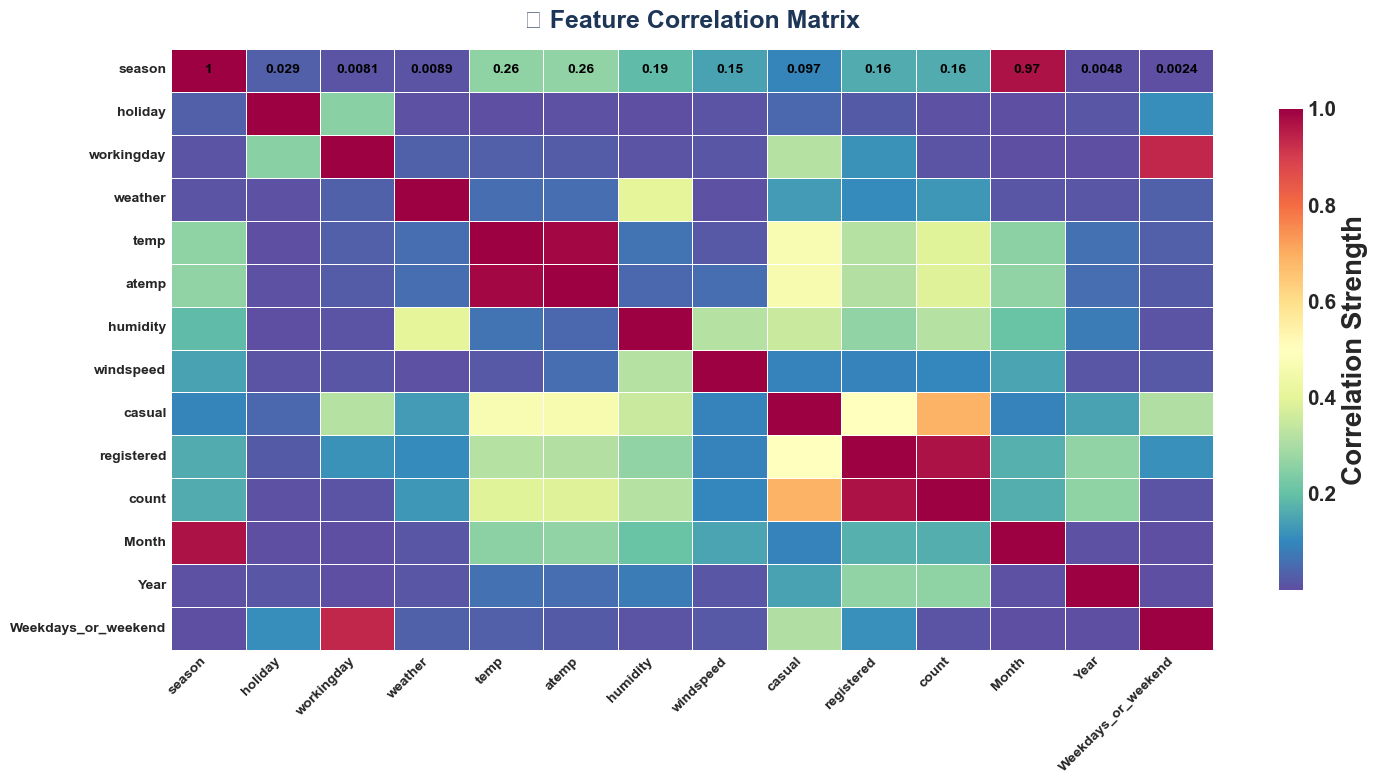

In [136]:
# 💡 Correlation Heatmap (AI-Styled)
plt.figure(figsize=(15, 8))
corr_matrix = df.corr()

sns.heatmap(
    abs(corr_matrix), 
    annot=True, 
    cmap='Spectral_r',      # vibrant gradient
    linewidths=0.4, 
    cbar_kws={'shrink': 0.8, 'label': 'Correlation Strength'},
    annot_kws={"size": 10, "weight": "bold", "color": "black"}
)

plt.title("🔍 Feature Correlation Matrix", fontsize=18, fontweight='bold', color='#1D3557', pad=15)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

In [138]:
# Make copy of dataset
df = df.copy()

🧠 MODELING

In [140]:
df.head(1)

season  holiday  workingday  weather  temp   atemp  humidity  windspeed  \
0       1        0           0        1  9.84  14.395        81        0.0   

   casual  registered  count  Month  Year  Weekdays_or_weekend  
0       3          13     16      1  2011                    1

In [142]:
print(df.columns)


Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'casual', 'registered', 'count', 'Month',
       'Year', 'Weekdays_or_weekend'],
      dtype='object')


In [145]:
if 'atemp' in df.columns:
    df.drop('atemp', axis=1, inplace=True)
else:
    print("Column 'atemp' not found in df")


Column 'atemp' not found in df


In [148]:
# Multicollinearity
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor

def Calculate_vif(X):
    '''
    Calculating VIF
    '''
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif



In [149]:
Calculate_vif(df[[i for i in df.describe().columns if i not in ['count']]])

variables           VIF
0                season  1.811824e+01
1               holiday  5.010655e+05
2            workingday  1.194100e+07
3               weather  1.239952e+00
4                  temp  1.443295e+00
5              humidity  1.661422e+00
6             windspeed  1.154541e+00
7                casual  2.220286e+00
8            registered  1.641524e+00
9                 Month  1.828555e+01
10                 Year  1.083631e+00
11  Weekdays_or_weekend  5.095868e+06

In [150]:
Calculate_vif(df[[i for i in df.describe().columns if i not in ['Rented Bike Count','Humidity(%)']]])

variables           VIF
0                season  1.811824e+01
1               holiday  5.010655e+05
2            workingday  1.194100e+07
3               weather  1.239952e+00
4                  temp  1.443295e+00
5              humidity  1.661422e+00
6             windspeed  1.154541e+00
7                casual           inf
8            registered           inf
9                 count           inf
10                Month  1.828555e+01
11                 Year  1.083631e+00
12  Weekdays_or_weekend  5.095868e+06

In [151]:
Calculate_vif(df[[i for i in df.describe().columns if i not in ['Rented Bike Count','Humidity(%)','Visibility (10m)']]])

variables           VIF
0                season  1.811824e+01
1               holiday  5.010655e+05
2            workingday  1.194100e+07
3               weather  1.239952e+00
4                  temp  1.443295e+00
5              humidity  1.661422e+00
6             windspeed  1.154541e+00
7                casual           inf
8            registered           inf
9                 count           inf
10                Month  1.828555e+01
11                 Year  1.083631e+00
12  Weekdays_or_weekend  5.095868e+06

In [159]:
# Dropping only the column that exists
df.drop(['windspeed'], inplace=True, axis=1)

In [156]:
df.describe().columns

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'windspeed',
       'casual', 'registered', 'count', 'Month', 'Year',
       'Weekdays_or_weekend'],
      dtype='object')

In [160]:
# Checking categories in 'season' column
df['season'].value_counts()

season
4    2734
2    2733
3    2733
1    2686
Name: count, dtype: int64

In [162]:
# Create dummy variables for the categorical variable 'season'
df['Spring'] = np.where(df['season'] == 'Spring', 1, 0)
df['Summer'] = np.where(df['season'] == 'Summer', 1, 0)
df['Autumn'] = np.where(df['season'] == 'Autumn', 1, 0)
df['Winter'] = np.where(df['season'] == 'Winter', 1, 0)


In [163]:
# Drop the original column 'season' from the dataframe
df.drop(columns=['season'], axis=1, inplace=True)


In [164]:
# Checking categories in 'holiday' column
df['holiday'].value_counts()


holiday
0    10575
1      311
Name: count, dtype: int64

In [165]:
# Labeling for holiday=1 and no holiday=0
df['holiday'] = df['holiday'].map({'No Holiday': 0, 'Holiday': 1})

In [166]:
# Checking categories in workingday column
df['workingday'].value_counts()


workingday
1    7412
0    3474
Name: count, dtype: int64

In [167]:
# Labeling for Yes=1 and No=0 in workingday column
df['workingday'] = df['workingday'].map({'Yes': 1, 'No': 0})


In [168]:
df.head()

holiday  workingday  weather  temp  casual  registered  count  Month  Year  \
0      NaN         NaN        1  9.84       3          13     16      1  2011   
1      NaN         NaN        1  9.02       8          32     40      1  2011   
2      NaN         NaN        1  9.02       5          27     32      1  2011   
3      NaN         NaN        1  9.84       3          10     13      1  2011   
4      NaN         NaN        1  9.84       0           1      1      1  2011   

   Weekdays_or_weekend  Spring  Summer  Autumn  Winter  
0                    1       0       0       0       0  
1                    1       0       0       0       0  
2                    1       0       0       0       0  
3                    1       0       0       0       0  
4                    1       0       0       0       0

In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              0 non-null      float64
 1   workingday           0 non-null      float64
 2   weather              10886 non-null  int64  
 3   temp                 10886 non-null  float64
 4   casual               10886 non-null  int64  
 5   registered           10886 non-null  int64  
 6   count                10886 non-null  int64  
 7   Month                10886 non-null  int32  
 8   Year                 10886 non-null  int32  
 9   Weekdays_or_weekend  10886 non-null  int64  
 10  Spring               10886 non-null  int32  
 11  Summer               10886 non-null  int32  
 12  Autumn               10886 non-null  int32  
 13  Winter               10886 non-null  int32  
dtypes: float64(3), int32(6), int64(5)
memory usage: 935.6 KB
